In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('./datasets/heart.csv')
df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [4]:
columns = df.select_dtypes(include=['object'])
columns

Sex ChestPainType RestingECG ExerciseAngina ST_Slope
0     M           ATA     Normal              N       Up
1     F           NAP     Normal              N     Flat
2     M           ATA         ST              N       Up
3     F           ASY     Normal              Y     Flat
4     M           NAP     Normal              N       Up
..   ..           ...        ...            ...      ...
913   M            TA     Normal              N     Flat
914   M           ASY     Normal              N     Flat
915   M           ASY     Normal              Y     Flat
916   F           ATA        LVH              N     Flat
917   M           NAP     Normal              N       Up

[918 rows x 5 columns]

In [5]:
pre_df = df.copy()

In [6]:
from sklearn.preprocessing import LabelEncoder

columns = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
encoders = {}

for column in columns :
    encoder = LabelEncoder()
    pre_df[column] = encoder.fit_transform(pre_df[column].tolist())
    encoders[column] = encoder
pre_df


Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0      172               0      0.0         2             0  
1      156               0      1.0         1             1  
2       98               0      0.0         2             0  
3      108               1      1.5         1             1  
4      122               0      0.0         2             0  
..     ...             ...      ...       ...           ...  
913    132               0      1.2         1             1  
914    141               0      3.4         1             1  
915    115               1      1.2         1             1  
916    174               0      0.0         1             1  
917    173               0      0.0         2             0  

[918 rows x 12 columns]

In [7]:
pre_1_df = pre_df.copy()

In [8]:
pre_df.HeartDisease.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [9]:
pre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [10]:
pre_df.duplicated().sum()

0

In [11]:
pre_df.corr()['HeartDisease'].sort_values(ascending=False)[1:]

ExerciseAngina    0.494282
Oldpeak           0.403951
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.107589
RestingECG        0.057384
Cholesterol      -0.232741
ChestPainType    -0.386828
MaxHR            -0.400421
ST_Slope         -0.558771
Name: HeartDisease, dtype: float64

<Axes: >

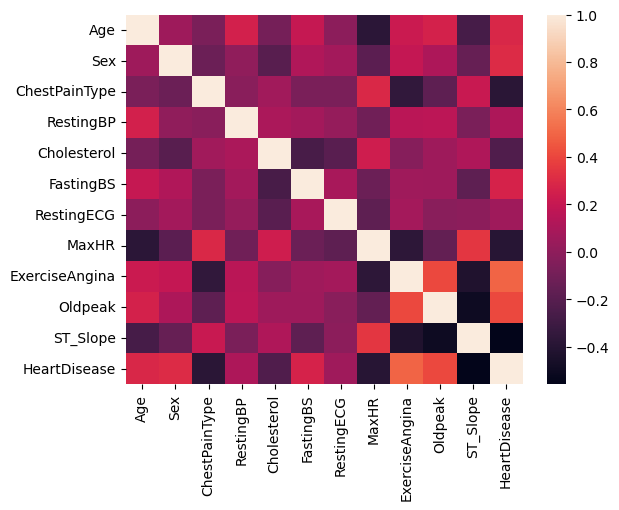

In [12]:
import seaborn as sns
sns.heatmap(pre_df.corr())

In [17]:
import torch
import torch.nn as nn
from torch.nn.functional import binary_cross_entropy
from torch.optim import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (ÏúÑ ÏΩîÎìúÏôÄ ÎèôÏùº)
features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)
X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=124)
X_val = torch.FloatTensor(X_val.values)
y_val = torch.FloatTensor(y_val.values).view(-1, 1)
X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

# Î™®Îç∏ ÌïôÏäµ Ìï®Ïàò Ï†ïÏùò
def train_model(X_train, y_train, lr=0.00009, epochs=100000):
    torch.manual_seed(124)
    W = torch.zeros((X_train.shape[1], 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    optimizer = SGD([W, b], lr=lr)
    
    for epoch in range(1, epochs + 1):
        H = torch.sigmoid(X_train.matmul(W) + b)
        loss = binary_cross_entropy(H, y_train)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    return W, b

# Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä Ìï®Ïàò Ï†ïÏùò
def evaluate_model(X, y, W, b):
    with torch.no_grad():
        H = torch.sigmoid(X.matmul(W) + b)
        y_pred = (H > 0.5).float()
        accuracy = accuracy_score(y.numpy(), y_pred.numpy())
    return accuracy

# ÏõêÎ≥∏ Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ ÌïôÏäµ Î∞è ÏÑ±Îä• ÌèâÍ∞Ä
W, b = train_model(X_train, y_train)
baseline_accuracy = evaluate_model(X_test, y_test, W, b)
print(f'Baseline Accuracy: {baseline_accuracy:.4f}')

# ÏàúÏó¥ Ï§ëÏöîÎèÑ Í≥ÑÏÇ∞
permutation_importance = []

for col in range(X_test.shape[1]):
    X_test_permuted = X_test.clone()
    X_test_permuted[:, col] = X_test_permuted[:, col][torch.randperm(X_test_permuted.size(0))]
    
    permuted_accuracy = evaluate_model(X_test_permuted, y_test, W, b)
    importance = baseline_accuracy - permuted_accuracy
    permutation_importance.append(importance)
    print(f'Feature {col}: Permutation Importance = {importance:.4f}')

# ÌîºÏ≤ò Ï§ëÏöîÎèÑ Ï∂úÎ†•
feature_names = pre_df.columns[:-1]  # ÌîºÏ≤ò Ïù¥Î¶ÑÎì§
for col, importance in zip(feature_names, permutation_importance):
    print(f'Feature {col}: Permutation Importance = {importance:.4f}')


Baseline Accuracy: 0.8696
Feature 0: Permutation Importance = 0.0109
Feature 1: Permutation Importance = 0.0326
Feature 2: Permutation Importance = 0.0761
Feature 3: Permutation Importance = 0.0000
Feature 4: Permutation Importance = 0.0652
Feature 5: Permutation Importance = 0.0000
Feature 6: Permutation Importance = 0.0000
Feature 7: Permutation Importance = -0.0109
Feature 8: Permutation Importance = -0.0109
Feature 9: Permutation Importance = 0.0217
Feature 10: Permutation Importance = 0.0326
Feature Age: Permutation Importance = 0.0109
Feature Sex: Permutation Importance = 0.0326
Feature ChestPainType: Permutation Importance = 0.0761
Feature RestingBP: Permutation Importance = 0.0000
Feature Cholesterol: Permutation Importance = 0.0652
Feature FastingBS: Permutation Importance = 0.0000
Feature RestingECG: Permutation Importance = 0.0000
Feature MaxHR: Permutation Importance = -0.0109
Feature ExerciseAngina: Permutation Importance = -0.0109
Feature Oldpeak: Permutation Importance =

In [18]:
pre_df.corr()['HeartDisease'].sort_values(ascending=False)[1:]

ExerciseAngina    0.494282
Oldpeak           0.403951
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.107589
RestingECG        0.057384
Cholesterol      -0.232741
ChestPainType    -0.386828
MaxHR            -0.400421
ST_Slope         -0.558771
Name: HeartDisease, dtype: float64

In [12]:
from statsmodels.api import OLS

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:           HeartDisease   R-squared (uncentered):                   0.775
Model:                            OLS   Adj. R-squared (uncentered):              0.773
Method:                 Least Squares   F-statistic:                              284.7
Date:                Wed, 15 May 2024   Prob (F-statistic):                   3.77e-285
Time:                        14:09:30   Log-Likelihood:                         -345.41
No. Observations:                 918   AIC:                                      712.8
Df Residuals:                     907   BIC:                                      765.9
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [16]:
pre_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

ExerciseAngina    0.494282
Oldpeak           0.403951
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.107589
RestingECG        0.057384
Cholesterol      -0.232741
ChestPainType    -0.386828
MaxHR            -0.400421
ST_Slope         -0.558771

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [14]:
get_vif(features)

vif_score         feature
0   30.261977             Age
1    4.912441             Sex
2    1.991361   ChestPainType
3   46.835556       RestingBP
4    5.227740     Cholesterol
5    1.482939       FastingBS
6    3.535198      RestingECG
7   26.142683           MaxHR
8    2.521587  ExerciseAngina
9    2.543331         Oldpeak
10   9.390390        ST_Slope

In [19]:
pre_df = pre_df.drop(labels=['RestingECG', 'FastingBS', 'RestingBP'], axis=1)

In [20]:
from sklearn.model_selection import train_test_split
features, targets = pre_df.iloc[:, :-1] , pre_df.iloc[:, -1]
X_train , X_test, y_train, y_test = \
train_test_split(features, targets, random_state=124, test_size=0.2)

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

lda_train = lda.fit_transform(X_train, y_train)

lda_columns = [f'lda{i + 1}' for i in range(lda_train.shape[1])]
lda_train_df = pd.DataFrame(lda_train, columns=lda_columns)
lda_train_df.loc[:, 'target'] = y_train

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú Ï†ïÏùò
parameters = {'lg__C': [0.1, 1, 10], 'lg__penalty': ['l1', 'l2']}

# Logistic Regression Í∞ùÏ≤¥ ÏÉùÏÑ±
lg = LogisticRegression(solver='liblinear', random_state=124)

# ÌååÏù¥ÌîÑÎùºÏù∏ Ï†ïÏùò
pipe = Pipeline([
    ('std', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis(n_components=1)),
    ('lg', lg)
])

# Í∑∏Î¶¨Îìú ÏÑúÏπò Í∞ùÏ≤¥ ÏÉùÏÑ±
g_lg = GridSearchCV(pipe, param_grid=parameters, cv=3, scoring='accuracy')

# Î™®Îç∏ ÌõàÎ†®
g_lg.fit(X_train, y_train)

# ÏµúÏ†ÅÏùò Î™®Îç∏ Î∞è ÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
print("Best parameters for Logistic Regression:", g_lg.best_params_)


Best parameters for Logistic Regression: {'lg__C': 1, 'lg__penalty': 'l2'}


In [23]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    roc_auc = roc_auc_score(y_test, prediction)

    print('Ïò§Ï∞® ÌñâÎ†¨')
    print(confusion)
    print('Ï†ïÌôïÎèÑ: {0:.4f}, Ï†ïÎ∞ÄÎèÑ: {1:.4f}, Ïû¨ÌòÑÏú®: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

Ïò§Ï∞® ÌñâÎ†¨
[[74 13]
 [13 84]]
Ï†ïÌôïÎèÑ: 0.8587, Ï†ïÎ∞ÄÎèÑ: 0.8660, Ïû¨ÌòÑÏú®: 0.8660, F1:0.8660, AUC:0.8583
###########################################################################


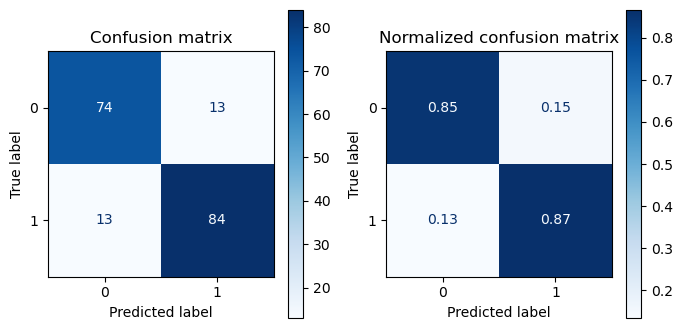

In [24]:
lg = g_lg.best_estimator_
prediction = lg.predict(X_test)
get_evaluation(y_test, prediction, lg, X_test)

In [16]:
from statsmodels.api import OLS

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:           HeartDisease   R-squared (uncentered):                   0.775
Model:                            OLS   Adj. R-squared (uncentered):              0.773
Method:                 Least Squares   F-statistic:                              284.7
Date:                Wed, 15 May 2024   Prob (F-statistic):                   3.77e-285
Time:                        14:09:30   Log-Likelihood:                         -345.41
No. Observations:                 918   AIC:                                      712.8
Df Residuals:                     907   BIC:                                      765.9
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [18]:
get_vif(features)

vif_score         feature
0   30.261977             Age
1    4.912441             Sex
2    1.991361   ChestPainType
3   46.835556       RestingBP
4    5.227740     Cholesterol
5    1.482939       FastingBS
6    3.535198      RestingECG
7   26.142683           MaxHR
8    2.521587  ExerciseAngina
9    2.543331         Oldpeak
10   9.390390        ST_Slope

In [19]:
# pre_df = pre_df.drop(labels=['RestingBP'], axis=1)

In [20]:
from statsmodels.api import OLS

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:           HeartDisease   R-squared (uncentered):                   0.775
Model:                            OLS   Adj. R-squared (uncentered):              0.773
Method:                 Least Squares   F-statistic:                              284.7
Date:                Wed, 15 May 2024   Prob (F-statistic):                   3.77e-285
Time:                        14:09:30   Log-Likelihood:                         -345.41
No. Observations:                 918   AIC:                                      712.8
Df Residuals:                     907   BIC:                                      765.9
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [21]:
get_vif(features)

vif_score         feature
0   30.261977             Age
1    4.912441             Sex
2    1.991361   ChestPainType
3   46.835556       RestingBP
4    5.227740     Cholesterol
5    1.482939       FastingBS
6    3.535198      RestingECG
7   26.142683           MaxHR
8    2.521587  ExerciseAngina
9    2.543331         Oldpeak
10   9.390390        ST_Slope

In [22]:
pre_df

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          175          0           1   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0      172               0      0.0         2             0  
1      156               0      1.0         1             1  
2       98               0      0.0         2             0  
3      108               1      1.5         1             1  
4      122               0      0.0         2             0  
..     ...             ...      ...       ...           ...  
913    132               0      1.2         1             1  
914    141               0      3.4         1             1  
915    115               1      1.2         1             1  
916    174               0      0.0         1             1  
917    173               0      0.0         2             0  

[918 rows x 12 columns]

### üí° 1 Cycle
> PytorchÎ°ú Î°úÏßÄÏä§Ìã±ÌöåÍ∑Ä ÏßÑÌñâ
>
> Validatation Data & TEST DataÏùò loss Í∞íÏùÑ ÎπÑÍµêÌïòÏó¨ Í≥ºÏ†ÅÌï© Î∂ÑÏÑù

1000/100000: lr: 0.000090, train_loss: 0.5748, val_loss: 0.5624
2000/100000: lr: 0.000090, train_loss: 0.5689, val_loss: 0.5551
3000/100000: lr: 0.000090, train_loss: 0.5636, val_loss: 0.5495
4000/100000: lr: 0.000090, train_loss: 0.5586, val_loss: 0.5444
5000/100000: lr: 0.000090, train_loss: 0.5538, val_loss: 0.5395
6000/100000: lr: 0.000090, train_loss: 0.5491, val_loss: 0.5348
7000/100000: lr: 0.000090, train_loss: 0.5446, val_loss: 0.5303
8000/100000: lr: 0.000090, train_loss: 0.5403, val_loss: 0.5260
9000/100000: lr: 0.000090, train_loss: 0.5362, val_loss: 0.5219
10000/100000: lr: 0.000090, train_loss: 0.5322, val_loss: 0.5179
11000/100000: lr: 0.000090, train_loss: 0.5283, val_loss: 0.5141
12000/100000: lr: 0.000090, train_loss: 0.5247, val_loss: 0.5105
13000/100000: lr: 0.000090, train_loss: 0.5211, val_loss: 0.5070
14000/100000: lr: 0.000090, train_loss: 0.5177, val_loss: 0.5036
15000/100000: lr: 0.000090, train_loss: 0.5143, val_loss: 0.5003
16000/100000: lr: 0.000090, train_

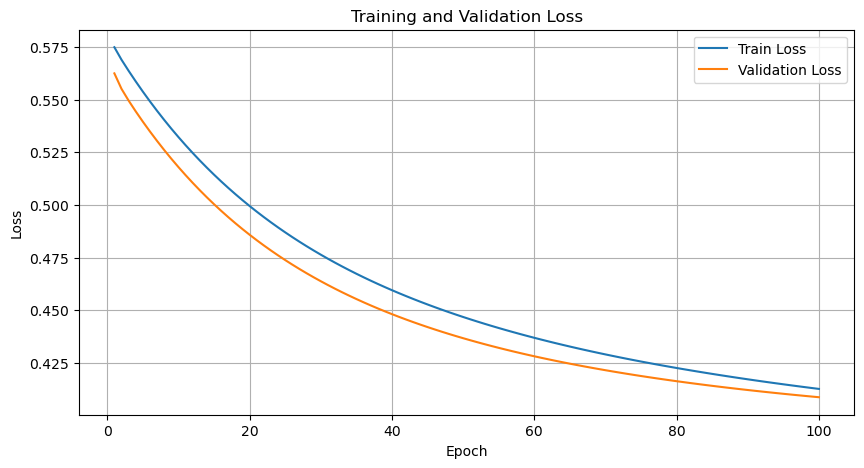

In [23]:
import torch
import torch.nn as nn
from torch.nn.functional import binary_cross_entropy
from torch.optim import SGD
from sklearn.model_selection import train_test_split

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)
X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=124)
X_val = torch.FloatTensor(X_val.values)
y_val = torch.FloatTensor(y_val.values).view(-1, 1)
X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

# ÌïôÏäµÎ•† ÌõÑÎ≥¥Îì§ Ï†ïÏùò
# learning_rates = [0.000004, 0.000006, 0.000009, 0.00001, 0.00005]
learning_rates = [0.00009]

# ÏÜêÏã§ Í∏∞Î°ùÏùÑ ÏúÑÌïú Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
train_losses = []
val_losses = []

# ÏúÑÏóêÏÑú ÏÑ†Ïñ∏Ìïú ÌïôÏäµÎ•† ÌõÑÎ≥¥Îì§ Î∞òÎ≥µ
for lr in learning_rates:
    # Î™®Îç∏ Ï¥àÍ∏∞Ìôî
    torch.manual_seed(124)
    W = torch.zeros((11, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    optimizer = SGD([W, b], lr=lr)
    
    # Î™®Îç∏ ÌõàÎ†®
    epochs = 100000
    for epoch in range(1, epochs + 1):
        H = torch.sigmoid(X_train.matmul(W) + b)
        loss = binary_cross_entropy(H, y_train)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # 1000Î≤à Î∞òÎ≥µÎßàÎã§ ÏÜêÏã§ Í∏∞Î°ù
        if epoch % 1000 == 0:
            train_losses.append(loss.item())
            val_loss = binary_cross_entropy(torch.sigmoid(X_val.matmul(W) + b), y_val)
            val_losses.append(val_loss.item())
            print('{:4d}/{}: lr: {:.6f}, train_loss: {:.4f}, val_loss: {:.4f}'.format(epoch, epochs, lr, loss.item(), val_loss.item()))

# ÏÜêÏã§ ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


#### ‚ú® PytorchÎ°ú Í≤ÄÏ¶ùÎç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏Îç∞Ïù¥ÌÑ∞ÏôÄÏùò loss Í∞íÏùÑ ÎπÑÍµêÌï¥Î≥¥ÏïòÏùÑ Îïå  

#### ÎëòÎã§ ÌÅ∞ Ï∞®Ïù¥Í∞Ä Î∞úÏÉùÌïòÏßÄ ÏïäÏïòÏúºÎØÄÎ°ú, Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞Îäî Í≥ºÏ†ÅÌï©Ïù¥ Î∞úÏÉùÌïòÏßÄ ÏïäÏïòÏùåÏùÑ Ïïå Ïàò ÏûàÎã§.

> Train Data loss: 0.4127 , Test Data loss: 0.4088

In [24]:
print(H)
print(H >= 0.5)
print(W, b)

tensor([[0.8558],
        [0.7223],
        [0.9144],
        [0.7852],
        [0.3205],
        [0.6723],
        [0.5813],
        [0.2252],
        [0.5610],
        [0.9066],
        [0.3309],
        [0.8881],
        [0.3372],
        [0.1084],
        [0.8435],
        [0.6588],
        [0.9830],
        [0.1992],
        [0.8176],
        [0.4189],
        [0.9487],
        [0.3787],
        [0.9043],
        [0.7557],
        [0.3963],
        [0.8359],
        [0.7814],
        [0.0651],
        [0.9108],
        [0.5638],
        [0.3717],
        [0.7634],
        [0.1927],
        [0.2193],
        [0.9327],
        [0.7895],
        [0.6830],
        [0.1080],
        [0.1469],
        [0.9364],
        [0.1487],
        [0.0554],
        [0.5467],
        [0.1204],
        [0.1606],
        [0.5565],
        [0.4046],
        [0.8586],
        [0.8957],
        [0.6902],
        [0.9082],
        [0.5677],
        [0.2847],
        [0.1503],
        [0.3944],
        [0

In [25]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    roc_auc = roc_auc_score(y_test, prediction)

    print('Ïò§Ï∞® ÌñâÎ†¨')
    print(confusion)
    print('Ï†ïÌôïÎèÑ: {0:.4f}, Ï†ïÎ∞ÄÎèÑ: {1:.4f}, Ïû¨ÌòÑÏú®: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [26]:
get_evaluation(y_test.detach().numpy(), torch.sigmoid(X_test.matmul(W) + b) >= 0.5)

Ïò§Ï∞® ÌñâÎ†¨
[[45  6]
 [ 6 35]]
Ï†ïÌôïÎèÑ: 0.8696, Ï†ïÎ∞ÄÎèÑ: 0.8537, Ïû¨ÌòÑÏú®: 0.8537, F1:0.8537, AUC:0.8680
###########################################################################


### üí° 1 Cycle Result
> PytorchÎ°ú Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞Ïùò Í≥ºÏ†ÅÌï©ÏùÑ Î∂ÑÏÑùÌïòÏòÄÎçîÎãà, ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏôÄ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Í∞ÑÏùò ÏÜêÏã§Í∞í Ï∞®Ïù¥Í∞Ä ÌÅ¨ÏßÄ ÏïäÏúºÎØÄÎ°ú ÏãúÍ∞ÅÌôî Î∂ÑÏÑù ÍπåÏßÄ Ìï¥Î≥∏ Í≤∞Í≥º Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞ÏóêÎäî Í≥ºÏ†ÅÌï©Ïù¥ Î∞úÏÉùÌïòÏßÄ ÏïäÏïòÏùåÏùÑ Ïïå Ïàò ÏûàÏóàÏäµÎãàÎã§.
>
> Í∑∏ Îã§Ïùå ÏµúÏ†ÅÏùò ÌïôÏäµÎ•†Î°ú Î°úÏßÄÏä§Ìã±ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ ÌïòÏòÄÏùÑ Îïå, ÏÑ±Îä• Ï†êÏàòÍ∞Ä Îß§Ïö∞ ÎÜíÍ≤å ÎÇòÏò® Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏóàÏäµÎãàÎã§.
>
> 

### ‚ú® 2 Cycle
> SklearnÏùÑ ÌôúÏö©Ìï¥ÏÑú Î°úÏßÄÏä§Ìã±ÌöåÍ∑ÄÎ∂ÑÏÑù

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

lg = LogisticRegression(solver='liblinear', penalty='l2', random_state=124)
lg.fit(X_train, y_train)
prediction = lg.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction)
    recall = recall_score(y_test , prediction)
    f1 = f1_score(y_test, prediction)
    roc_auc = roc_auc_score(y_test, prediction)

    print('Ïò§Ï∞® ÌñâÎ†¨')
    print(confusion)
    print('Ï†ïÌôïÎèÑ: {0:.4f}, Ï†ïÎ∞ÄÎèÑ: {1:.4f}, Ïû¨ÌòÑÏú®: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy , precision ,recall, f1, roc_auc))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

Ïò§Ï∞® ÌñâÎ†¨
[[66 16]
 [12 90]]
Ï†ïÌôïÎèÑ: 0.8478, Ï†ïÎ∞ÄÎèÑ: 0.8491, Ïû¨ÌòÑÏú®: 0.8824, F1:0.8654, AUC:0.8436
###########################################################################


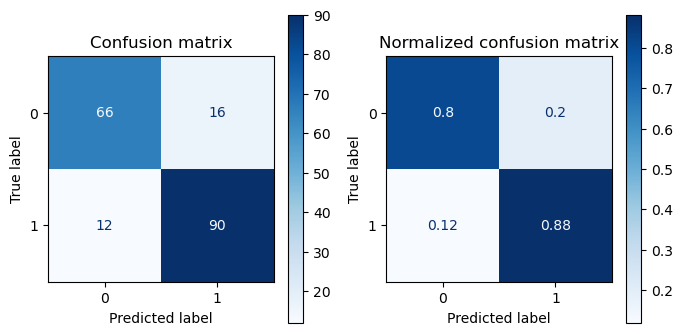

In [29]:
get_evaluation(y_test, prediction, lg, X_test)

### üí° 2 Cycle Result
> PytorchÏóêÏÑú ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìïú Í≤∞Í≥ºÏôÄ sklearnÏóêÏÑú Logistic RegressionÏùÑ ÏÇ¨Ïö©Ìïú Í≤∞Í≥ºÍ∞Ä ÎπÑÏä∑Ìïú ÏàòÏπòÎ•º Î≥¥Ïù¥ÏßÄÎßå
>
> pytorchÎ°ú Î°úÏßÄÏä§Ìã±ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ ÌïòÏòÄÏùÑ ÎïåÍ∞Ä Îçî ÏÑ±Îä•Ïù¥ ÎÜíÏùÄ Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏóàÏäµÎãàÎã§.
>
> Í≤∞Î°†Ï†ÅÏúºÎ°ú Î°úÏßÄÏä§Ìã±ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ ÏÇ¨Ïö©ÌñàÏùÑ Îïå, Î™®Îì† ÏÑ±Îä•Ï†êÏàòÍ∞Ä 0.8Î•º ÏÉÅÌöåÌïòÎäî Í≤ÉÏùÑ Î≥º Ïàò ÏûàÏúºÎØÄÎ°ú, Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞ÏóêÏÑúÎäî Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÍ∏∞Î≤ïÏù¥ Ï¢ãÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïù∏Îã§.

### ‚ú® 3 Cycle 
> Ï∞®Ïõê Ï∂ïÏÜåÎ•º Ìïú Îã§Ïùå, Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä ÏßÑÌñâ

In [30]:
from sklearn.model_selection import train_test_split
features, targets = pre_1_df.iloc[:, :-1] , pre_1_df.iloc[:, -1]
X_train , X_test, y_train, y_test = \
train_test_split(features, targets, random_state=124, test_size=0.2)

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

lda_train = lda.fit_transform(X_train, y_train)

lda_columns = [f'lda{i + 1}' for i in range(lda_train.shape[1])]
lda_train_df = pd.DataFrame(lda_train, columns=lda_columns)
lda_train_df.loc[:, 'target'] = y_train

In [32]:
lda_train_df

lda1  target
0   -1.338247     0.0
1   -0.874846     1.0
2   -1.578165     0.0
3   -1.801278     1.0
4    1.549450     0.0
..        ...     ...
729  0.258390     0.0
730  0.997413     NaN
731  2.204229     1.0
732  1.922674     1.0
733 -2.258518     0.0

[734 rows x 2 columns]

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# ÌååÎùºÎØ∏ÌÑ∞ Í∑∏Î¶¨Îìú Ï†ïÏùò
parameters = {'lg__C': [0.1, 1, 10], 'lg__penalty': ['l1', 'l2']}

# Logistic Regression Í∞ùÏ≤¥ ÏÉùÏÑ±
lg = LogisticRegression(solver='liblinear', random_state=124)

# ÌååÏù¥ÌîÑÎùºÏù∏ Ï†ïÏùò
pipe = Pipeline([
    ('std', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis(n_components=1)),
    ('lg', lg)
])

# Í∑∏Î¶¨Îìú ÏÑúÏπò Í∞ùÏ≤¥ ÏÉùÏÑ±
g_lg = GridSearchCV(pipe, param_grid=parameters, cv=3, scoring='accuracy')

# Î™®Îç∏ ÌõàÎ†®
g_lg.fit(X_train, y_train)

# ÏµúÏ†ÅÏùò Î™®Îç∏ Î∞è ÌååÎùºÎØ∏ÌÑ∞ Ï∂úÎ†•
print("Best parameters for Logistic Regression:", g_lg.best_params_)


Best parameters for Logistic Regression: {'lg__C': 0.1, 'lg__penalty': 'l2'}


In [34]:
result_df = pd.DataFrame(g_lg.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

params  mean_test_score  rank_test_score
0  {'lg__C': 0.1, 'lg__penalty': 'l1'}         0.839222                6
1  {'lg__C': 0.1, 'lg__penalty': 'l2'}         0.844675                1
2    {'lg__C': 1, 'lg__penalty': 'l1'}         0.843314                2
3    {'lg__C': 1, 'lg__penalty': 'l2'}         0.843314                2
4   {'lg__C': 10, 'lg__penalty': 'l1'}         0.843314                2
5   {'lg__C': 10, 'lg__penalty': 'l2'}         0.843314                2

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# ÌÉÄÍ≤ü Îç∞Ïù¥ÌÑ∞ÏôÄ ÏòàÏ∏° Í∞ùÏ≤¥Î•º Ï†ÑÎã¨Î∞õÎäîÎã§.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     Ïò§Ï∞® ÌñâÎ†¨
    confusion = confusion_matrix(y_test, prediction)
#     Ï†ïÌôïÎèÑ
    accuracy = accuracy_score(y_test , prediction)
#     Ï†ïÎ∞ÄÎèÑ
    precision = precision_score(y_test , prediction)
#     Ïû¨ÌòÑÏú®
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)

#    ROC_AUC
    roc_auc = roc_auc_score(y_test, prediction )
    
    print('Ïò§Ï∞® ÌñâÎ†¨')
    print(confusion)
    print('Ï†ïÌôïÎèÑ: {0:.4f}, Ï†ïÎ∞ÄÎèÑ: {1:.4f}, Ïû¨ÌòÑÏú®: {2:.4f}, F1: {3:.4f}, ROC_AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

Ïò§Ï∞® ÌñâÎ†¨
[[74 13]
 [13 84]]
Ï†ïÌôïÎèÑ: 0.8587, Ï†ïÎ∞ÄÎèÑ: 0.8660, Ïû¨ÌòÑÏú®: 0.8660, F1: 0.8660, ROC_AUC: 0.8583
################################################################################


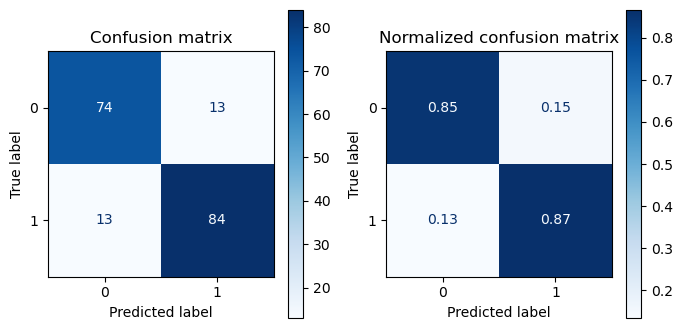

In [36]:
lg = g_lg.best_estimator_
prediction = lg.predict(X_test)
get_evaluation(y_test, prediction, lg, X_test)

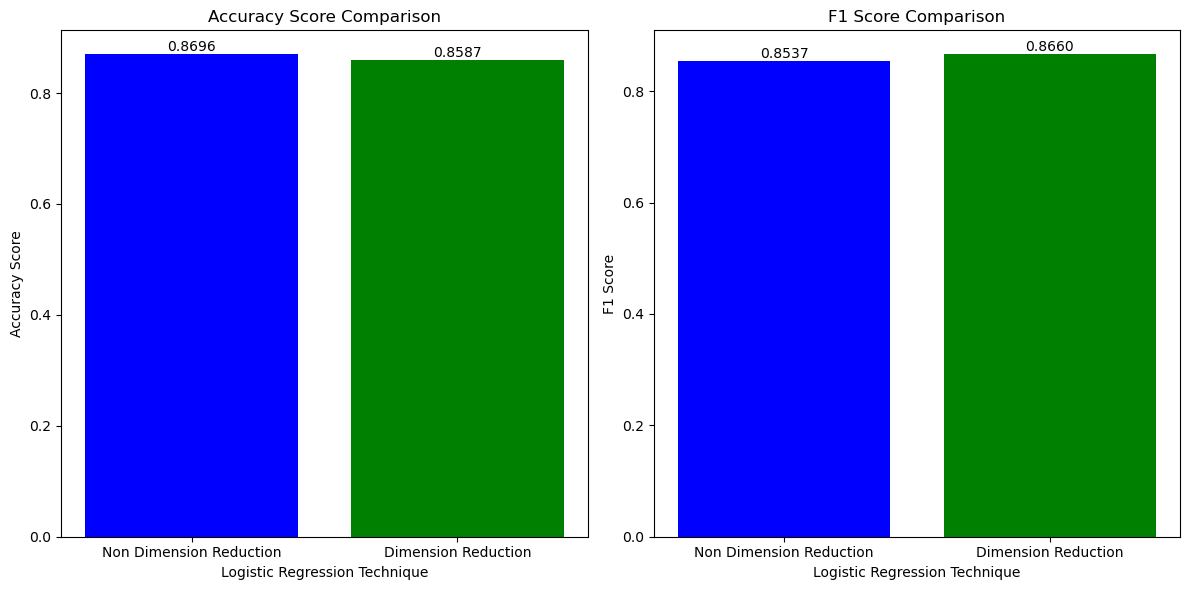

In [37]:
import matplotlib.pyplot as plt

acc_score = [0.8696, 0.8587]
f1_score = [0.8537, 0.8660]
dimension = ['Non Dimension Reduction',  'Dimension Reduction']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Ï†ïÌôïÎèÑ Ï†êÏàò Î∞î Ï∞®Ìä∏
for i in range(len(dimension)):
    axes[0].bar(dimension[i], acc_score[i], color=['blue',  'green'][i])
    axes[0].text(dimension[i], acc_score[i], f'{acc_score[i]:.4f}', ha='center', va='bottom')

axes[0].set_title('Accuracy Score Comparison')
axes[0].set_xlabel('Logistic Regression Technique')
axes[0].set_ylabel('Accuracy Score')

# F1 Ïä§ÏΩîÏñ¥ Î∞î Ï∞®Ìä∏
for i in range(len(dimension)):
    axes[1].bar(dimension[i], f1_score[i], color=['blue',  'green'][i])
    axes[1].text(dimension[i], f1_score[i], f'{f1_score[i]:.4f}', ha='center', va='bottom')

axes[1].set_title('F1 Score Comparison')
axes[1].set_xlabel('Logistic Regression Technique')
axes[1].set_ylabel('F1 Score')

plt.tight_layout()
plt.show()

### üí° 2 Cycle Result
- Ï∞®ÏõêÏ∂ïÏÜåÎ•º ÌïòÏßÄ ÏïäÍ≥†, Î°úÏßÄÏä§Ìã±ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ ÏÇ¨Ïö©ÌïòÏòÄÏùÑ Í≤ΩÏö∞ÏôÄ LDAÎ•º ÌÜµÌï¥ 2Ï∞®ÏõêÏúºÎ°ú Ï∞®ÏõêÏ∂ïÏÜåÎ•º ÌïòÏòÄÏùÑ ÎïåÏôÄ ÌÅ∞ Ï∞®Ïù¥Í∞Ä ÏóÜÏùåÏùÑ Ïïå Ïàò ÏûàÏäµÎãàÎã§.
- Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ Ï∞®Ïõê Ï∂ïÏÜåÎêú Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°ÏùÑ ÏàòÌñâÌïòÍ≥†, Ïù¥Ïóê Îî∞Î•∏ ÏûÑÍ≥ÑÏπòÎ•º Ï°∞Ï†ïÌïòÏó¨ Ïò§Ï∞® ÌñâÎ†¨ÏùÑ Î∂ÑÏÑùÌïòÍ≤†ÏäµÎãàÎã§.

### üí° 3 Cycle
> Logistic Regression ÏúºÎ°ú Î∂ÑÏÑùÌïú Îç∞Ïù¥ÌÑ∞Ïóê ÏûÑÍ≥ÑÏπò(Threshold) Ï°∞Ï†à ÏãúÌñâ

### Ïã¨Î∂ÄÏ†Ñ ÏßàÌôò ÌôòÏûê ÏòàÏ∏° 
#### Ïò§Ï∞®ÌñâÎ†¨

- ÏñëÏÑ±(Positive) > 1: Ïã¨Î∂ÄÏ†Ñ ÏßàÌôò  ÌôòÏûêÎ•º ÏùòÎØ∏.
- ÏùåÏÑ±(Negative) > 0: Ï†ïÏÉÅ ÌôòÏûêÎ•º ÏùòÎØ∏.


> True Positive (TP): Î™®Îç∏Ïù¥ Ïã¨Î∂ÄÏ†Ñ ÌôòÏûêÎ•º Ïò¨Î∞îÎ•¥Í≤å Î∂ÑÎ•ò Ìïú Í≤ΩÏö∞
>  
> False Positive (FP): Î™®Îç∏Ïù¥ Ï†ïÏÉÅ ÌôòÏûêÎ•º Ïã¨Î∂ÄÏ†Ñ ÌôòÏûêÎ°ú ÏûòÎ™ª Î∂ÑÎ•òÌïú Í≤ΩÏö∞(Ïò§ÏßÑ, error I)
>  
> True Negative (TN): Î™®Îç∏Ïù¥ Ï†ïÏÉÅ ÌôòÏûêÎ•º Ï†ïÏÉÅÏúºÎ°ú Ïò¨Î∞îÎ•¥Í≤å Î∂ÑÎ•òÌïú Í≤ΩÏö∞ 
> 
> False Negative (FN): Î™®Îç∏Ïù¥ Ïã¨Î∂ÄÏ†Ñ ÌôòÏûêÎ•º Ï†ïÏÉÅÏúºÎ°ú ÏûòÎ™ª Î∂ÑÎ•òÌïú Í≤ΩÏö∞ (ÎÜìÏπ®, error II)  

> Ï†ïÎ∞ÄÎèÑ (Precision): Î™®Îç∏ÏùÑ Ïã¨Î∂ÄÏ†Ñ ÌôòÏûêÎ°ú ÏòàÏ∏°ÌïòÏòÄÏùÑ Îïå Ï†ïÏÉÅÏ†ÅÏúºÎ°ú Ïã§Ï†ú ÏòàÏ∏°Ìïú ÌôòÏûêÍ∞Ä Ïã¨Î∂ÄÏ†Ñ ÌôòÏûêÏù∏ Í≤ΩÏö∞Ïùò ÎπÑÏú®
>
> Ïû¨ÌòÑÏú® (Recall) :  Ïã§Ï†ú Ïã¨Î∂ÄÏ†Ñ ÌôòÏûê Ï§ëÏóêÏÑú Î™®Îç∏Ïù¥ Ï†ïÌôïÌïòÍ≤å Ïã¨Î∂ÄÏ†Ñ ÌôòÏûêÎ°ú ÏòàÏ∏° ÌïòÏòÄÎäîÏßÄÏùò ÎπÑÏú®
> 
> üèÜÏûÑÍ≥ÑÏπòÎ•º ÎÇÆÏ∂∞ÏÑú Ïû¨ÌòÑÏú®ÏùÑ ÎÜíÏó¨Ï£ºÎäî Í≤ÉÏù¥ Ï†ÅÌï©ÌïòÎã§. (Ïã§Ï†ú Ïã¨Î∂ÄÏ†Ñ ÌôòÏûêÎ•º Ï†ïÏÉÅÏúºÎ°ú ÏûòÎ™ªÎ∂ÑÎ•òÌïòÏßÄ ÏïäÍ≤åÎÅî ÌïòÍ∏∞ ÏúÑÌï¥)

In [38]:
from sklearn.preprocessing import Binarizer

threshold = 0.5

proba = lg.predict_proba(X_test)
prediction = lg.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# ÌÉÄÍ≤ü Îç∞Ïù¥ÌÑ∞ÏôÄ ÏòàÏ∏° Í∞ùÏ≤¥Î•º Ï†ÑÎã¨Î∞õÎäîÎã§.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     Ïò§Ï∞® ÌñâÎ†¨
    confusion = confusion_matrix(y_test, prediction)
#     Ï†ïÌôïÎèÑ
    accuracy = accuracy_score(y_test , prediction)
#     Ï†ïÎ∞ÄÎèÑ
    precision = precision_score(y_test , prediction)
#     Ïû¨ÌòÑÏú®
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)

#    ROC_AUC
    roc_auc = roc_auc_score(y_test, prediction )
    
    print('Ïò§Ï∞® ÌñâÎ†¨')
    print(confusion)
    print('Ï†ïÌôïÎèÑ: {0:.4f}, Ï†ïÎ∞ÄÎèÑ: {1:.4f}, Ïû¨ÌòÑÏú®: {2:.4f}, F1: {3:.4f}, ROC_AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [40]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

Ïò§Ï∞® ÌñâÎ†¨
[[74 13]
 [13 84]]
Ï†ïÌôïÎèÑ: 0.8587, Ï†ïÎ∞ÄÎèÑ: 0.8660, Ïû¨ÌòÑÏú®: 0.8660, F1: 0.8660, ROC_AUC: 0.8583
################################################################################


In [41]:
thresholds = [0.15, 0.2, 0.24, 0.3, 0.4,0.47, 0.5,  0.56, 0.57, 0.58, 0.59, 0.6, 0.7]


def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)

get_evaluation_by_thresholds(y_test, proba[:, 1].reshape(-1, 1), thresholds)

0.15
Ïò§Ï∞® ÌñâÎ†¨
[[42 45]
 [ 1 96]]
Ï†ïÌôïÎèÑ: 0.7500, Ï†ïÎ∞ÄÎèÑ: 0.6809, Ïû¨ÌòÑÏú®: 0.9897, F1: 0.8067, ROC_AUC: 0.7362
################################################################################
0.2
Ïò§Ï∞® ÌñâÎ†¨
[[52 35]
 [ 2 95]]
Ï†ïÌôïÎèÑ: 0.7989, Ï†ïÎ∞ÄÎèÑ: 0.7308, Ïû¨ÌòÑÏú®: 0.9794, F1: 0.8370, ROC_AUC: 0.7885
################################################################################
0.24
Ïò§Ï∞® ÌñâÎ†¨
[[58 29]
 [ 5 92]]
Ï†ïÌôïÎèÑ: 0.8152, Ï†ïÎ∞ÄÎèÑ: 0.7603, Ïû¨ÌòÑÏú®: 0.9485, F1: 0.8440, ROC_AUC: 0.8076
################################################################################
0.3
Ïò§Ï∞® ÌñâÎ†¨
[[61 26]
 [ 6 91]]
Ï†ïÌôïÎèÑ: 0.8261, Ï†ïÎ∞ÄÎèÑ: 0.7778, Ïû¨ÌòÑÏú®: 0.9381, F1: 0.8505, ROC_AUC: 0.8196
################################################################################
0.4
Ïò§Ï∞® ÌñâÎ†¨
[[67 20]
 [ 9 88]]
Ï†ïÌôïÎèÑ: 0.8424, Ï†ïÎ∞ÄÎèÑ: 0.8148, Ïû¨ÌòÑÏú®: 0.9072, F1: 0.8585, ROC_AUC: 0.8387
################################################################

#### ÏûÑÍ≥ÑÏπòÎ•º 0.4Î°ú ÎÇÆÏ∂∞ÏÑú Ïû¨ÌòÑÏú®ÏùÑ ÎÜíÌòÄÏïº Ìï©ÎãàÎã§.

In [42]:
from sklearn.preprocessing import Binarizer

threshold = 0.4

proba = lg.predict_proba(X_test)
prediction = lg.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# ÌÉÄÍ≤ü Îç∞Ïù¥ÌÑ∞ÏôÄ ÏòàÏ∏° Í∞ùÏ≤¥Î•º Ï†ÑÎã¨Î∞õÎäîÎã§.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     Ïò§Ï∞® ÌñâÎ†¨
    confusion = confusion_matrix(y_test, prediction)
#     Ï†ïÌôïÎèÑ
    accuracy = accuracy_score(y_test , prediction)
#     Ï†ïÎ∞ÄÎèÑ
    precision = precision_score(y_test , prediction)
#     Ïû¨ÌòÑÏú®
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)

#    ROC_AUC
    roc_auc = roc_auc_score(y_test, prediction )
    
    print('Ïò§Ï∞® ÌñâÎ†¨')
    print(confusion)
    print('Ï†ïÌôïÎèÑ: {0:.4f}, Ï†ïÎ∞ÄÎèÑ: {1:.4f}, Ïû¨ÌòÑÏú®: {2:.4f}, F1: {3:.4f}, ROC_AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [44]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

Ïò§Ï∞® ÌñâÎ†¨
[[67 20]
 [ 9 88]]
Ï†ïÌôïÎèÑ: 0.8424, Ï†ïÎ∞ÄÎèÑ: 0.8148, Ïû¨ÌòÑÏú®: 0.9072, F1: 0.8585, ROC_AUC: 0.8387
################################################################################


#### üí° ÏûÑÍ≥ÑÏπòÎ•º 0.4Î°ú ÎÇÆÏ∂ò Í≤∞Í≥º Ï†ïÌôïÎèÑÎäî Í∏∞Ï°¥ 0.85ÏóêÏÑú 0.84Î°ú ÎÇÆÏïÑÏ°åÏßÄÎßå, Ïû¨ÌòÑÏú®ÏùÑ 0.86ÏóêÏÑú 0.9Î°ú ÎÜíÌûê Ïàò ÏûàÏóàÍ≥†,  

#### F1 Score ÎòêÌïú 0.85Î°ú Ï†ÅÌï©Ìïú ÏàòÏπòÎ•º Î≥¥Ïù¥ÎØÄÎ°ú, Ï∞®ÏõêÏ∂ïÏÜåÎ•º Ìïú Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏñªÍ≥†Ïûê ÌïòÎäî ÏµúÏ¢Ö Í≤∞Í≥ºÎ•º ÏñªÏùÑ Ïàò ÏûàÏóàÏäµÎãàÎã§.

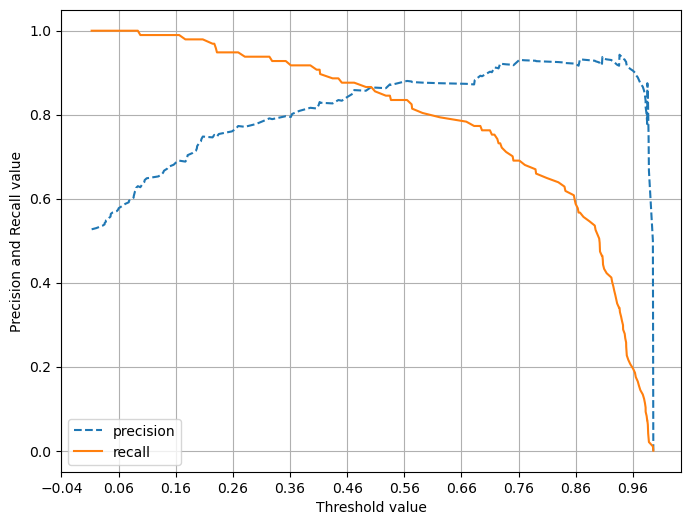

In [45]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    # XÏ∂ï: threshold
    # YÏ∂ï: Ï†ïÎ∞ÄÎèÑ, Ïû¨ÌòÑÏú® 
    # Ï†ïÎ∞ÄÎèÑÎäî Ï†êÏÑ†ÏúºÎ°ú ÌëúÏãú
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # XÏ∂ï(threshold)Ïùò ScaleÏùÑ 0 ~ 1 Îã®ÏúÑÎ°ú Î≥ÄÍ≤Ω
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
precision_recall_curve_plot(y_test, lg.predict_proba(X_test)[:, 1].reshape(-1, 1))

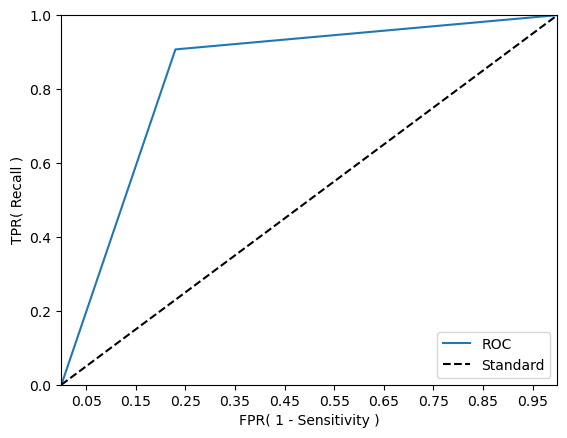

In [46]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     ÏûÑÍ≥ÑÍ∞íÏóê Îî∞Î•∏ FPR, TPR Í∞í
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC CurveÎ•º plot Í≥°ÏÑ†ÏúºÎ°ú Í∑∏Î¶º. 
    plt.plot(fprs , tprs, label='ROC')
#     Í∞ÄÏö¥Îç∞ ÎåÄÍ∞ÅÏÑ† ÏßÅÏÑ†ÏùÑ Í∑∏Î¶º. 
#     TPRÍ≥º FPRÏù¥ ÎèôÏùºÌïú ÎπÑÏú®Î°ú Îñ®Ïñ¥ÏßÑÎã§Îäî Í≤ÉÏùÄ Î™®Îç∏Ïù¥ ÏñëÏÑ±Í≥º ÏùåÏÑ±ÏùÑ Íµ¨Î≥ÑÌïòÏßÄ Î™ªÌïúÎã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏ÌïúÎã§.
#     Îã§Î•∏ Î∂ÑÎ•òÍ∏∞Î•º ÌåêÎã®ÌïòÍ∏∞ ÏúÑÌïú Í∏∞Ï§ÄÏÑ†ÏúºÎ°ú ÏÇ¨Ïö©ÎêòÎ©∞, 
#     ÎåÄÍ∞ÅÏÑ†Ïóê Í∞ÄÍπåÏö∏ ÏàòÎ°ù ÏòàÏ∏°Ïóê ÏÇ¨Ïö©ÌïòÍ∏∞ ÌûòÎì† Î™®Îç∏Ïù¥ÎùºÎäî ÎúªÏù¥Îã§.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # XÏ∂ï(FPR)Ïùò ScaleÏùÑ 0.1 Îã®ÏúÑÎ°ú Î≥ÄÍ≤Ω
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, custom_prediction)

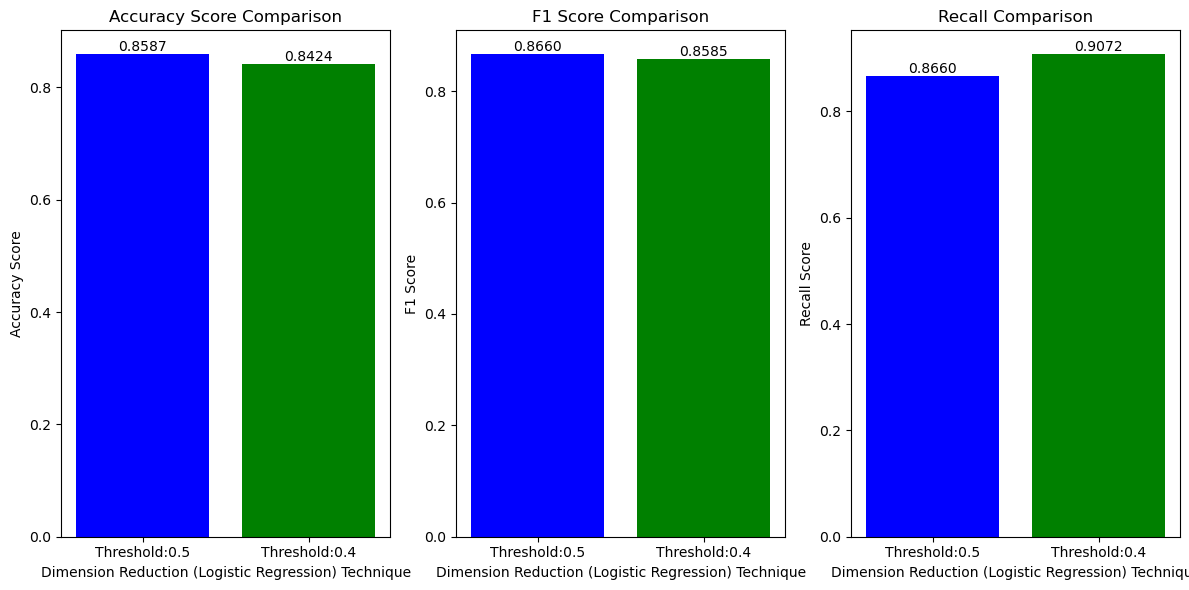

In [47]:
import matplotlib.pyplot as plt
# 0.4
# Ïò§Ï∞® ÌñâÎ†¨
# [[67 20]
#  [ 9 88]]
# Ï†ïÌôïÎèÑ: 0.8424, Ï†ïÎ∞ÄÎèÑ: 0.8148, Ïû¨ÌòÑÏú®: 0.9072, F1: 0.8585, ROC_AUC: 0.8387
# ################################################################################

# 0.5
# Ïò§Ï∞® ÌñâÎ†¨
# [[74 13]
#  [13 84]]
# Ï†ïÌôïÎèÑ: 0.8587, Ï†ïÎ∞ÄÎèÑ: 0.8660, Ïû¨ÌòÑÏú®: 0.8660, F1: 0.8660, ROC_AUC: 0.8583
# ################################################################################

acc_score = [0.8587, 0.8424]
f1_score = [0.8660, 0.8585]
recall_score = [0.8660, 0.9072]

dimension = ['Threshold:0.5', 'Threshold:0.4']

fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Ï†ïÌôïÎèÑ Ï†êÏàò Î∞î Ï∞®Ìä∏
for i in range(len(dimension)):
    axes[0].bar(dimension[i], acc_score[i], color=['blue',  'green'][i])
    axes[0].text(dimension[i], acc_score[i], f'{acc_score[i]:.4f}', ha='center', va='bottom')

axes[0].set_title('Accuracy Score Comparison')
axes[0].set_xlabel('Dimension Reduction (Logistic Regression) Technique')
axes[0].set_ylabel('Accuracy Score')

# F1 Ïä§ÏΩîÏñ¥ Î∞î Ï∞®Ìä∏
for i in range(len(dimension)):
    axes[1].bar(dimension[i], f1_score[i], color=['blue',  'green'][i])
    axes[1].text(dimension[i], f1_score[i], f'{f1_score[i]:.4f}', ha='center', va='bottom')

axes[1].set_title('F1 Score Comparison')
axes[1].set_xlabel('Dimension Reduction (Logistic Regression) Technique')
axes[1].set_ylabel('F1 Score')

# Recall Ïä§ÏΩîÏñ¥ Î∞î Ï∞®Ìä∏
for i in range(len(dimension)):
    axes[2].bar(dimension[i], recall_score[i], color=['blue',  'green'][i])
    axes[2].text(dimension[i], recall_score[i], f'{recall_score[i]:.4f}', ha='center', va='bottom')

axes[2].set_title('Recall Comparison')
axes[2].set_xlabel('Dimension Reduction (Logistic Regression) Technique')
axes[2].set_ylabel('Recall Score')

plt.tight_layout()
plt.show()

### üí°3 Cycle Result
> Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÍ∏∞Î≤ïÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú Ï∞®ÏõêÏ∂ïÏÜåÎ•º Ìïú Í≤∞Í≥º ÏûÑÍ≥ÑÏπòÎ•º 0.4Î°ú ÎÇÆÏ∂ú Í≤ΩÏö∞ Ï†ïÌôïÎèÑ Ï†êÏàòÏôÄ F1 ScoreÎäî ÏïÑÏ£º ÎÇÆÏùÄ Ìè≠ÏúºÎ°ú ÎÇÆÏïÑÏ°åÏßÄÎßå, Ïû¨ÌòÑÏú®ÏùÑ 0.86ÏóêÏÑú 0.9Î°ú ÎÜíÌûòÏúºÎ°úÏç® ÏñªÍ≥†Ïûê ÌïòÎäî Í≤∞Í≥ºÎ•º ÏñªÏùÑ Ïàò ÏûàÏóàÏäµÎãàÎã§.
>
> ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú ÏûÑÍ≥ÑÏπòÎ•º 0.4Î°ú ÎÇÆÏ∂ú Îïå ÏµúÏ†ÅÏùò Í≤∞Í≥ºÎ•º ÏñªÏùÑ Ïàò ÏûàÏóàÏäµÎãàÎã§.

### ‚ú® 4 Cycle
> Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î∞è OLS Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ Î°úÏßÄÏä§Ìã±ÌöåÍ∑ÄÎ∂ÑÏÑùÏùò ÏÑ±Îä•ÏùÑ ÎÜíÌòÄÎ≥¥Í≤†ÏäµÎãàÎã§.

In [48]:
from statsmodels.api import OLS

features, targets = pre_df.iloc[:,:-1], pre_df.iloc[:,-1]
model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:           HeartDisease   R-squared (uncentered):                   0.775
Model:                            OLS   Adj. R-squared (uncentered):              0.773
Method:                 Least Squares   F-statistic:                              284.7
Date:                Wed, 15 May 2024   Prob (F-statistic):                   3.77e-285
Time:                        14:10:24   Log-Likelihood:                         -345.41
No. Observations:                 918   AIC:                                      712.8
Df Residuals:                     907   BIC:                                      765.9
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [50]:
get_vif(features)

vif_score         feature
0   30.261977             Age
1    4.912441             Sex
2    1.991361   ChestPainType
3   46.835556       RestingBP
4    5.227740     Cholesterol
5    1.482939       FastingBS
6    3.535198      RestingECG
7   26.142683           MaxHR
8    2.521587  ExerciseAngina
9    2.543331         Oldpeak
10   9.390390        ST_Slope

#### Îã§Ï§ëÍ≥µÏÑ†ÏÑ±ÏóêÏÑú Î¨∏Ï†úÍ∞Ä ÏûàÎäî Feature : Age , RestingBP , MaxHR
#### P-Value Ï†êÏàòÍ∞Ä ÎÜíÏùÄ Feature : RestingECG , MaxHR 

In [51]:
pre_df.corr()['HeartDisease'].sort_values(ascending=False)[1:]

ExerciseAngina    0.494282
Oldpeak           0.403951
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.107589
RestingECG        0.057384
Cholesterol      -0.232741
ChestPainType    -0.386828
MaxHR            -0.400421
ST_Slope         -0.558771
Name: HeartDisease, dtype: float64

### üìå ÌÉÄÍ≤üÎç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î∂ÑÏÑù 
- Ï†úÍ±∞Ìï† Feature : RestingBP , RestingECG

In [52]:
pre_df = pre_df.drop(labels=['RestingBP' , 'RestingECG'], axis=1)

In [53]:
from statsmodels.api import OLS

features, targets = pre_df.iloc[:,:-1], pre_df.iloc[:,-1]
model = OLS(targets, features)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:           HeartDisease   R-squared (uncentered):                   0.772
Model:                            OLS   Adj. R-squared (uncentered):              0.770
Method:                 Least Squares   F-statistic:                              342.6
Date:                Wed, 15 May 2024   Prob (F-statistic):                   5.48e-285
Time:                        14:10:24   Log-Likelihood:                         -351.71
No. Observations:                 918   AIC:                                      721.4
Df Residuals:                     909   BIC:                                      764.8
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [54]:
get_vif(features)

vif_score         feature
0  18.348505             Age
1   4.812491             Sex
2   1.989646   ChestPainType
3   5.001527     Cholesterol
4   1.474868       FastingBS
5  22.195708           MaxHR
6   2.424020  ExerciseAngina
7   2.530854         Oldpeak
8   9.038754        ST_Slope

### üìå Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î∞è OLS (ÏµúÏÜåÏ†úÍ≥±Î≤ï) Ìï¥Í≤∞ ÌõÑ Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î∂ÑÏÑù Ïã§Ïãú

1000/100000: lr: 0.000090, train_loss: 0.5813, val_loss: 0.5671
2000/100000: lr: 0.000090, train_loss: 0.5754, val_loss: 0.5610
3000/100000: lr: 0.000090, train_loss: 0.5699, val_loss: 0.5555
4000/100000: lr: 0.000090, train_loss: 0.5647, val_loss: 0.5503
5000/100000: lr: 0.000090, train_loss: 0.5596, val_loss: 0.5452
6000/100000: lr: 0.000090, train_loss: 0.5547, val_loss: 0.5404
7000/100000: lr: 0.000090, train_loss: 0.5500, val_loss: 0.5357
8000/100000: lr: 0.000090, train_loss: 0.5455, val_loss: 0.5313
9000/100000: lr: 0.000090, train_loss: 0.5412, val_loss: 0.5270
10000/100000: lr: 0.000090, train_loss: 0.5371, val_loss: 0.5229
11000/100000: lr: 0.000090, train_loss: 0.5331, val_loss: 0.5190
12000/100000: lr: 0.000090, train_loss: 0.5292, val_loss: 0.5152
13000/100000: lr: 0.000090, train_loss: 0.5255, val_loss: 0.5116
14000/100000: lr: 0.000090, train_loss: 0.5219, val_loss: 0.5081
15000/100000: lr: 0.000090, train_loss: 0.5185, val_loss: 0.5048
16000/100000: lr: 0.000090, train_

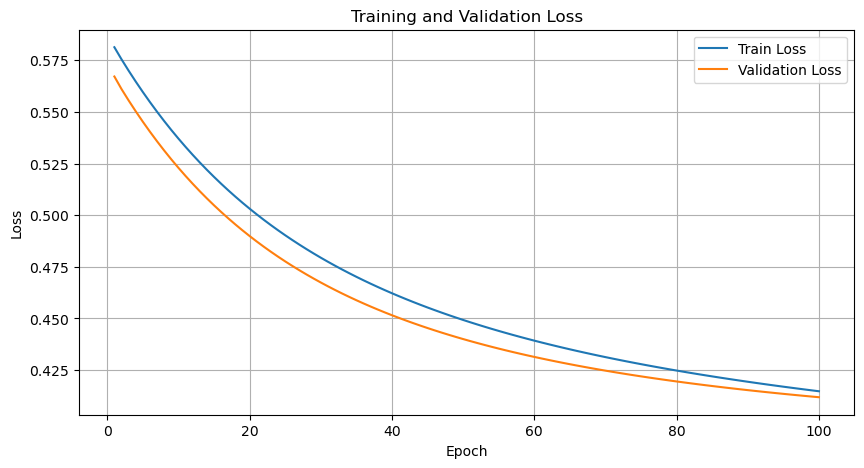

In [55]:
import torch
import torch.nn as nn
from torch.nn.functional import binary_cross_entropy
from torch.optim import SGD
from sklearn.model_selection import train_test_split

# Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)
X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=124)
X_val = torch.FloatTensor(X_val.values)
y_val = torch.FloatTensor(y_val.values).view(-1, 1)
X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

# ÌïôÏäµÎ•† ÌõÑÎ≥¥Îì§ Ï†ïÏùò
# learning_rates = [0.000004, 0.000006, 0.000009, 0.00001, 0.00005]
learning_rates = [0.00009]

# ÏÜêÏã§ Í∏∞Î°ùÏùÑ ÏúÑÌïú Î¶¨Ïä§Ìä∏ Ï¥àÍ∏∞Ìôî
train_losses = []
val_losses = []

# ÏúÑÏóêÏÑú ÏÑ†Ïñ∏Ìïú ÌïôÏäµÎ•† ÌõÑÎ≥¥Îì§ Î∞òÎ≥µ
for lr in learning_rates:
    # Î™®Îç∏ Ï¥àÍ∏∞Ìôî
    torch.manual_seed(124)
    W = torch.zeros((9, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    optimizer = SGD([W, b], lr=lr)
    
    # Î™®Îç∏ ÌõàÎ†®
    epochs = 100000
    for epoch in range(1, epochs + 1):
        H = torch.sigmoid(X_train.matmul(W) + b)
        loss = binary_cross_entropy(H, y_train)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # 1000Î≤à Î∞òÎ≥µÎßàÎã§ ÏÜêÏã§ Í∏∞Î°ù
        if epoch % 1000 == 0:
            train_losses.append(loss.item())
            val_loss = binary_cross_entropy(torch.sigmoid(X_val.matmul(W) + b), y_val)
            val_losses.append(val_loss.item())
            print('{:4d}/{}: lr: {:.6f}, train_loss: {:.4f}, val_loss: {:.4f}'.format(epoch, epochs, lr, loss.item(), val_loss.item()))

# ÏÜêÏã§ ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

#### üìå Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Î¨∏Ï†úÍ∞Ä ÏûàÏóàÎçò FeatureÎì§ÏùÑ Ï†úÍ±∞ ÌõÑ pytorchÎ°ú Í≥ºÏ†ÅÌï©ÏùÑ Î∂ÑÏÑùÌïòÏòÄÏäµÎãàÎã§.
- ##### Í∑∏ Í≤∞Í≥º Ïù¥Ï†Ñ Feature Ï†úÍ±∞ Ï†Ñ Î≥¥Îã§ train dataÏôÄ validation data ÏôÄÏùò ÏÜêÏã§Í∞í Ï∞®Ïù¥Í∞Ä Îçî Ï§ÑÏóàÏúºÎ©∞, Í≥ºÏ†ÅÌï©ÏùÑ Îçî Ìï¥ÏÜå Ìï† Ïàò ÏûàÏóàÏäµÎãàÎã§.

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# ÌÉÄÍ≤ü Îç∞Ïù¥ÌÑ∞ÏôÄ ÏòàÏ∏° Í∞ùÏ≤¥Î•º Ï†ÑÎã¨Î∞õÎäîÎã§.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     Ïò§Ï∞® ÌñâÎ†¨
    confusion = confusion_matrix(y_test, prediction)
#     Ï†ïÌôïÎèÑ
    accuracy = accuracy_score(y_test , prediction)
#     Ï†ïÎ∞ÄÎèÑ
    precision = precision_score(y_test , prediction)
#     Ïû¨ÌòÑÏú®
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)

#    ROC_AUC
    roc_auc = roc_auc_score(y_test, prediction )
    
    print('Ïò§Ï∞® ÌñâÎ†¨')
    print(confusion)
    print('Ï†ïÌôïÎèÑ: {0:.4f}, Ï†ïÎ∞ÄÎèÑ: {1:.4f}, Ïû¨ÌòÑÏú®: {2:.4f}, F1: {3:.4f}, ROC_AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [57]:
get_evaluation(y_test.detach().numpy(), torch.sigmoid(X_test.matmul(W) + b) >= 0.5)

Ïò§Ï∞® ÌñâÎ†¨
[[44  7]
 [ 6 35]]
Ï†ïÌôïÎèÑ: 0.8587, Ï†ïÎ∞ÄÎèÑ: 0.8333, Ïû¨ÌòÑÏú®: 0.8537, F1: 0.8434, ROC_AUC: 0.8582
################################################################################


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

features, targets = pre_df.iloc[:, :-1], pre_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, stratify=targets, random_state=124)

lg = LogisticRegression(solver='liblinear', penalty='l2', random_state=124)
lg.fit(X_train, y_train)
prediction = lg.predict(X_test)

Ïò§Ï∞® ÌñâÎ†¨
[[66 16]
 [10 92]]
Ï†ïÌôïÎèÑ: 0.8587, Ï†ïÎ∞ÄÎèÑ: 0.8519, Ïû¨ÌòÑÏú®: 0.9020, F1: 0.8762, ROC_AUC: 0.8534
################################################################################


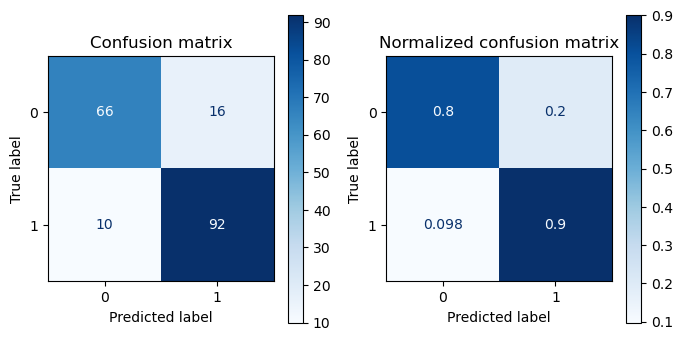

In [59]:
get_evaluation(y_test, prediction, lg, X_test)

### üí° 4 Cycle Result

- üìà Îã§Ï§ëÍ≥µÏÑ†ÏÑ± Ìï¥ÏÜå ÌõÑ ÌååÏù¥ÌÜ†ÏπòÎ°ú Î°úÏßÄÏä§Ìã±ÌöåÍ∑ÄÎ∂ÑÏÑù Í≤∞Í≥ºÏôÄ ÏÇ¨Ïù¥ÌÇ∑Îü∞ÏúºÎ°ú Î°úÏßÄÏä§Ìã±ÌöåÍ∑ÄÎ∂ÑÏÑùÏùÑ Ìïú Îç∞Ïù¥ÌÑ∞ÏôÄ  Ï∞®Ïõê Ï∂ïÏÜåÎ•º ÌñàÏùÑ ÎïåÏùò Îç∞Ïù¥ÌÑ∞ ÏÑ±Îä•Í≥º Ï†ïÌôïÎèÑ Î∂ÄÎ∂ÑÏóêÏÑú ÎèôÏùº Ìïú Í≤ÉÏùÑ Ïïå Ïàò ÏûàÏóàÏäµÎãàÎã§!
- ‚ú® Í≤∞Î°†Ï†ÅÏúºÎ°ú Ìï¥Îãπ Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Í≥ºÏ†ÅÌï©ÏùÑ ÏôÑÏ†ÑÌûà Ìï¥ÏÜåÌïòÍ≥† Ïã†Î¢∞ÏÑ±ÏùÑ ÎÜíÌûàÎ†§Î©¥ Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Í≥º OLS Î¨∏Ï†úÎ•º ÏùºÏúºÌÇ§Îäî Feature Ï†úÍ±∞ ÌõÑ ÏûëÏóÖÌï¥Ïïº Ìï©ÎãàÎã§!

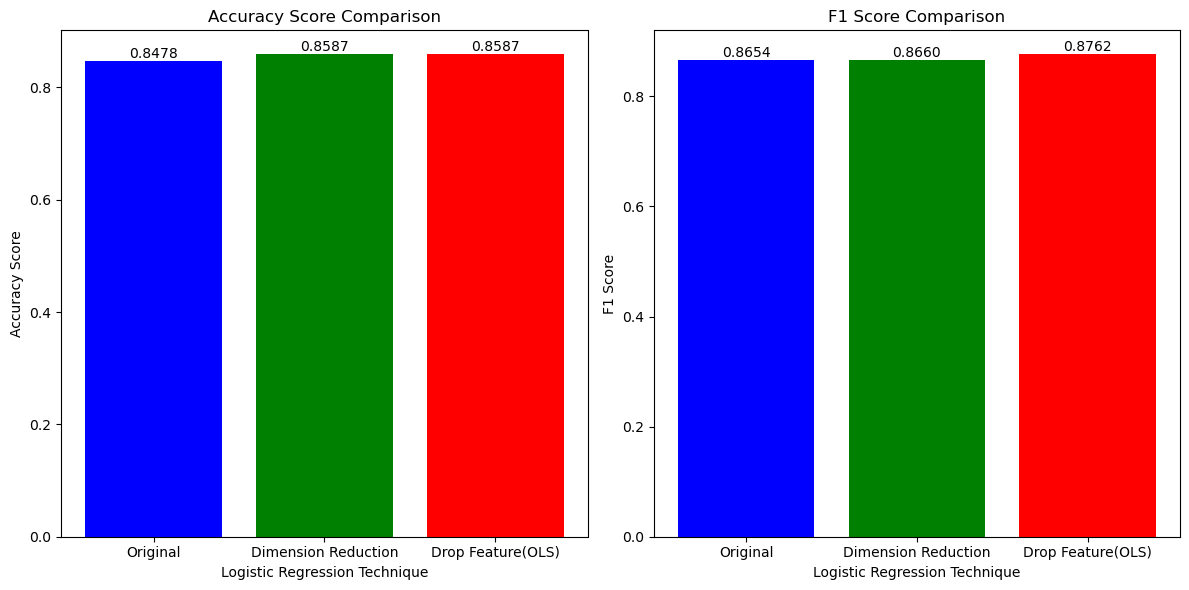

In [100]:
import matplotlib.pyplot as plt

acc_score = [0.8478, 0.8587, 0.8587]
f1_score = [0.8654, 0.8660, 0.8762]
dimension = ['Original',  'Dimension Reduction', 'Drop Feature(OLS)']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Ï†ïÌôïÎèÑ Ï†êÏàò Î∞î Ï∞®Ìä∏
for i in range(len(dimension)):
    axes[0].bar(dimension[i], acc_score[i], color=['blue', 'green', 'red'][i])
    axes[0].text(dimension[i], acc_score[i], f'{acc_score[i]:.4f}', ha='center', va='bottom')

axes[0].set_title('Accuracy Score Comparison')
axes[0].set_xlabel('Logistic Regression Technique')
axes[0].set_ylabel('Accuracy Score')

# F1 Ïä§ÏΩîÏñ¥ Î∞î Ï∞®Ìä∏
for i in range(len(dimension)):
    axes[1].bar(dimension[i], f1_score[i], color=['blue',  'green', 'red'][i])
    axes[1].text(dimension[i], f1_score[i], f'{f1_score[i]:.4f}', ha='center', va='bottom')

axes[1].set_title('F1 Score Comparison')
axes[1].set_xlabel('Logistic Regression Technique')
axes[1].set_ylabel('F1 Score')

plt.tight_layout()
plt.show()

### üí° 5 Cycle 
> Logistic Regression ÏúºÎ°ú Î∂ÑÏÑùÌïú Îç∞Ïù¥ÌÑ∞Ïóê ÏûÑÍ≥ÑÏπò(Threshold) Ï°∞Ï†à ÏãúÌñâ

### Ïã¨Î∂ÄÏ†Ñ ÏßàÌôò ÌôòÏûê ÏòàÏ∏° 
#### Ïò§Ï∞®ÌñâÎ†¨

- ÏñëÏÑ±(Positive) > 1: Ïã¨Î∂ÄÏ†Ñ ÏßàÌôò  ÌôòÏûêÎ•º ÏùòÎØ∏.
- ÏùåÏÑ±(Negative) > 0: Ï†ïÏÉÅ ÌôòÏûêÎ•º ÏùòÎØ∏.


> True Positive (TP): Î™®Îç∏Ïù¥ Ïã¨Î∂ÄÏ†Ñ ÌôòÏûêÎ•º Ïò¨Î∞îÎ•¥Í≤å Î∂ÑÎ•ò Ìïú Í≤ΩÏö∞
>  
> False Positive (FP): Î™®Îç∏Ïù¥ Ï†ïÏÉÅ ÌôòÏûêÎ•º Ïã¨Î∂ÄÏ†Ñ ÌôòÏûêÎ°ú ÏûòÎ™ª Î∂ÑÎ•òÌïú Í≤ΩÏö∞(Ïò§ÏßÑ, error I)
>  
> True Negative (TN): Î™®Îç∏Ïù¥ Ï†ïÏÉÅ ÌôòÏûêÎ•º Ï†ïÏÉÅÏúºÎ°ú Ïò¨Î∞îÎ•¥Í≤å Î∂ÑÎ•òÌïú Í≤ΩÏö∞ 
> 
> False Negative (FN): Î™®Îç∏Ïù¥ Ïã¨Î∂ÄÏ†Ñ ÌôòÏûêÎ•º Ï†ïÏÉÅÏúºÎ°ú ÏûòÎ™ª Î∂ÑÎ•òÌïú Í≤ΩÏö∞ (ÎÜìÏπ®, error II)  

> Ï†ïÎ∞ÄÎèÑ (Precision): Î™®Îç∏ÏùÑ Ïã¨Î∂ÄÏ†Ñ ÌôòÏûêÎ°ú ÏòàÏ∏°ÌïòÏòÄÏùÑ Îïå Ï†ïÏÉÅÏ†ÅÏúºÎ°ú Ïã§Ï†ú ÏòàÏ∏°Ìïú ÌôòÏûêÍ∞Ä Ïã¨Î∂ÄÏ†Ñ ÌôòÏûêÏù∏ Í≤ΩÏö∞Ïùò ÎπÑÏú®
>
> Ïû¨ÌòÑÏú® (Recall) :  Ïã§Ï†ú Ïã¨Î∂ÄÏ†Ñ ÌôòÏûê Ï§ëÏóêÏÑú Î™®Îç∏Ïù¥ Ï†ïÌôïÌïòÍ≤å Ïã¨Î∂ÄÏ†Ñ ÌôòÏûêÎ°ú ÏòàÏ∏° ÌïòÏòÄÎäîÏßÄÏùò ÎπÑÏú®
> 
> üèÜÏûÑÍ≥ÑÏπòÎ•º ÎÇÆÏ∂∞ÏÑú Ïû¨ÌòÑÏú®ÏùÑ ÎÜíÏó¨Ï£ºÎäî Í≤ÉÏù¥ Ï†ÅÌï©ÌïòÎã§. (Ïã§Ï†ú Ïã¨Î∂ÄÏ†Ñ ÌôòÏûêÎ•º Ï†ïÏÉÅÏúºÎ°ú ÏûòÎ™ªÎ∂ÑÎ•òÌïòÏßÄ ÏïäÍ≤åÎÅî ÌïòÍ∏∞ ÏúÑÌï¥)

In [28]:
from sklearn.preprocessing import Binarizer

threshold = 0.5

proba = lg.predict_proba(X_test)
prediction = lg.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# ÌÉÄÍ≤ü Îç∞Ïù¥ÌÑ∞ÏôÄ ÏòàÏ∏° Í∞ùÏ≤¥Î•º Ï†ÑÎã¨Î∞õÎäîÎã§.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     Ïò§Ï∞® ÌñâÎ†¨
    confusion = confusion_matrix(y_test, prediction)
#     Ï†ïÌôïÎèÑ
    accuracy = accuracy_score(y_test , prediction)
#     Ï†ïÎ∞ÄÎèÑ
    precision = precision_score(y_test , prediction)
#     Ïû¨ÌòÑÏú®
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)

#    ROC_AUC
    roc_auc = roc_auc_score(y_test, prediction )
    
    print('Ïò§Ï∞® ÌñâÎ†¨')
    print(confusion)
    print('Ï†ïÌôïÎèÑ: {0:.4f}, Ï†ïÎ∞ÄÎèÑ: {1:.4f}, Ïû¨ÌòÑÏú®: {2:.4f}, F1: {3:.4f}, ROC_AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [30]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

Ïò§Ï∞® ÌñâÎ†¨
[[74 13]
 [13 84]]
Ï†ïÌôïÎèÑ: 0.8587, Ï†ïÎ∞ÄÎèÑ: 0.8660, Ïû¨ÌòÑÏú®: 0.8660, F1: 0.8660, ROC_AUC: 0.8583
################################################################################


In [31]:
thresholds = [0.15, 0.2, 0.24, 0.3, 0.4,0.47, 0.5,  0.56, 0.57, 0.58, 0.59, 0.6, 0.7]


def get_evaluation_by_thresholds(y_test, proba_class1, thresholds):
    for threshold in thresholds:
        print(threshold)
        binarizer = Binarizer(threshold=threshold).fit(proba_class1)
        custom_prediction = binarizer.transform(proba_class1)
        get_evaluation(y_test, custom_prediction)

get_evaluation_by_thresholds(y_test, proba[:, 1].reshape(-1, 1), thresholds)

0.15
Ïò§Ï∞® ÌñâÎ†¨
[[45 42]
 [ 1 96]]
Ï†ïÌôïÎèÑ: 0.7663, Ï†ïÎ∞ÄÎèÑ: 0.6957, Ïû¨ÌòÑÏú®: 0.9897, F1: 0.8170, ROC_AUC: 0.7535
################################################################################
0.2
Ïò§Ï∞® ÌñâÎ†¨
[[54 33]
 [ 2 95]]
Ï†ïÌôïÎèÑ: 0.8098, Ï†ïÎ∞ÄÎèÑ: 0.7422, Ïû¨ÌòÑÏú®: 0.9794, F1: 0.8444, ROC_AUC: 0.8000
################################################################################
0.24
Ïò§Ï∞® ÌñâÎ†¨
[[63 24]
 [ 4 93]]
Ï†ïÌôïÎèÑ: 0.8478, Ï†ïÎ∞ÄÎèÑ: 0.7949, Ïû¨ÌòÑÏú®: 0.9588, F1: 0.8692, ROC_AUC: 0.8415
################################################################################
0.3
Ïò§Ï∞® ÌñâÎ†¨
[[67 20]
 [ 4 93]]
Ï†ïÌôïÎèÑ: 0.8696, Ï†ïÎ∞ÄÎèÑ: 0.8230, Ïû¨ÌòÑÏú®: 0.9588, F1: 0.8857, ROC_AUC: 0.8644
################################################################################
0.4
Ïò§Ï∞® ÌñâÎ†¨
[[71 16]
 [11 86]]
Ï†ïÌôïÎèÑ: 0.8533, Ï†ïÎ∞ÄÎèÑ: 0.8431, Ïû¨ÌòÑÏú®: 0.8866, F1: 0.8643, ROC_AUC: 0.8513
################################################################

#### ÏûÑÍ≥ÑÏπòÎ•º 0.4Î°ú ÎÇÆÏ∂∞ÏÑú Ïû¨ÌòÑÏú®ÏùÑ ÎÜíÌòÄÏïº Ìï©ÎãàÎã§.

In [32]:
from sklearn.preprocessing import Binarizer

threshold = 0.3

proba = lg.predict_proba(X_test)
prediction = lg.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# ÌÉÄÍ≤ü Îç∞Ïù¥ÌÑ∞ÏôÄ ÏòàÏ∏° Í∞ùÏ≤¥Î•º Ï†ÑÎã¨Î∞õÎäîÎã§.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     Ïò§Ï∞® ÌñâÎ†¨
    confusion = confusion_matrix(y_test, prediction)
#     Ï†ïÌôïÎèÑ
    accuracy = accuracy_score(y_test , prediction)
#     Ï†ïÎ∞ÄÎèÑ
    precision = precision_score(y_test , prediction)
#     Ïû¨ÌòÑÏú®
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)

#    ROC_AUC
    roc_auc = roc_auc_score(y_test, prediction )
    
    print('Ïò§Ï∞® ÌñâÎ†¨')
    print(confusion)
    print('Ï†ïÌôïÎèÑ: {0:.4f}, Ï†ïÎ∞ÄÎèÑ: {1:.4f}, Ïû¨ÌòÑÏú®: {2:.4f}, F1: {3:.4f}, ROC_AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [34]:
custom_proba = proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=threshold).fit(custom_proba)
custom_prediction = binarizer.transform(custom_proba)

get_evaluation(y_test, custom_prediction)

Ïò§Ï∞® ÌñâÎ†¨
[[67 20]
 [ 4 93]]
Ï†ïÌôïÎèÑ: 0.8696, Ï†ïÎ∞ÄÎèÑ: 0.8230, Ïû¨ÌòÑÏú®: 0.9588, F1: 0.8857, ROC_AUC: 0.8644
################################################################################


#### üìå ÏûÑÍ≥ÑÏπòÎ•º 0.3ÏúºÎ°ú ÎÇÆÏ∂òÍ≤∞Í≥º Ï†ïÌôïÎèÑÍ∞Ä 0.8696, Ïû¨ÌòÑÏú®Ïù¥ 0.9588, F1 ScoreÍ∞Ä 0.8857Î°ú Î™®Îëê Í∏∞Ï°¥ 0.5ÏùºÎïå Î≥¥Îã§ ÎÜíÍ≤å ÎÇòÏôîÏäµÎãàÎã§.

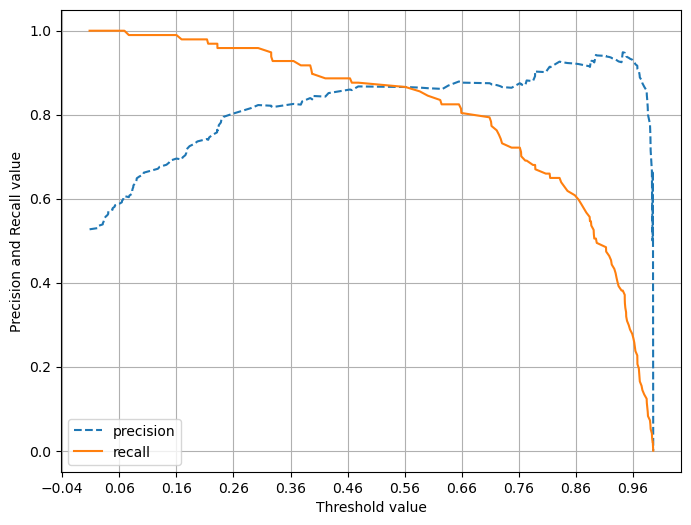

In [35]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test , proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, proba_class1)
    
    # XÏ∂ï: threshold
    # YÏ∂ï: Ï†ïÎ∞ÄÎèÑ, Ïû¨ÌòÑÏú® 
    # Ï†ïÎ∞ÄÎèÑÎäî Ï†êÏÑ†ÏúºÎ°ú ÌëúÏãú
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # XÏ∂ï(threshold)Ïùò ScaleÏùÑ 0 ~ 1 Îã®ÏúÑÎ°ú Î≥ÄÍ≤Ω
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()
precision_recall_curve_plot(y_test, lg.predict_proba(X_test)[:, 1].reshape(-1, 1))

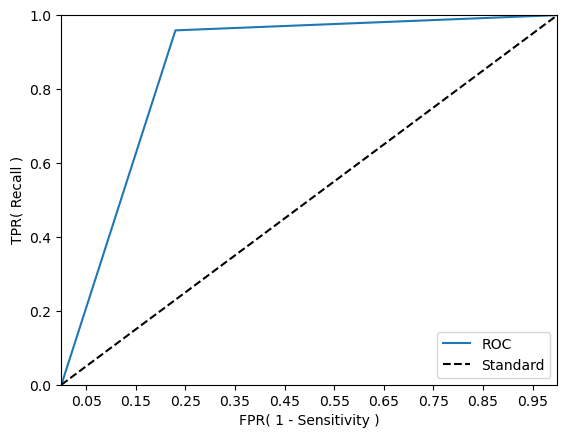

In [36]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , proba_class1):
#     ÏûÑÍ≥ÑÍ∞íÏóê Îî∞Î•∏ FPR, TPR Í∞í
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC CurveÎ•º plot Í≥°ÏÑ†ÏúºÎ°ú Í∑∏Î¶º. 
    plt.plot(fprs , tprs, label='ROC')
#     Í∞ÄÏö¥Îç∞ ÎåÄÍ∞ÅÏÑ† ÏßÅÏÑ†ÏùÑ Í∑∏Î¶º. 
#     TPRÍ≥º FPRÏù¥ ÎèôÏùºÌïú ÎπÑÏú®Î°ú Îñ®Ïñ¥ÏßÑÎã§Îäî Í≤ÉÏùÄ Î™®Îç∏Ïù¥ ÏñëÏÑ±Í≥º ÏùåÏÑ±ÏùÑ Íµ¨Î≥ÑÌïòÏßÄ Î™ªÌïúÎã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏ÌïúÎã§.
#     Îã§Î•∏ Î∂ÑÎ•òÍ∏∞Î•º ÌåêÎã®ÌïòÍ∏∞ ÏúÑÌïú Í∏∞Ï§ÄÏÑ†ÏúºÎ°ú ÏÇ¨Ïö©ÎêòÎ©∞, 
#     ÎåÄÍ∞ÅÏÑ†Ïóê Í∞ÄÍπåÏö∏ ÏàòÎ°ù ÏòàÏ∏°Ïóê ÏÇ¨Ïö©ÌïòÍ∏∞ ÌûòÎì† Î™®Îç∏Ïù¥ÎùºÎäî ÎúªÏù¥Îã§.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # XÏ∂ï(FPR)Ïùò ScaleÏùÑ 0.1 Îã®ÏúÑÎ°ú Î≥ÄÍ≤Ω
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, custom_prediction)

### üí° 6 Cycle 
> Îã§Ï§ëÍ≥µÏÑ†ÏÑ±ÏùÑ Ìï¥ÏÜåÌïú Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Î∂ÑÎ•òÎ™®Îç∏Îì§ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏÑ±Îä•ÏùÑ Î∂ÑÏÑùÌïòÍ≤†ÏäµÎãàÎã§.
>
> Í∞ÄÏû• ÏÑ±Îä•Ïù¥ ÎÜíÍ≤å ÎÇòÏò® Î∂ÑÎ•òÎ™®Îç∏Ïùò Feature ImportanceÏôÄ Í∏∞Ï°¥ correlationÍ≥º ÎπÑÍµêÌïòÏó¨ ÏÑ±Îä•ÏùÑ ÎÜíÌòÄÎ≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [69]:
from sklearn.model_selection import train_test_split
features, targets = pre_df.iloc[:, :-1] , pre_df.iloc[:, -1]
X_train , X_test, y_train, y_test = \
train_test_split(features, targets, random_state=124, test_size=0.2)

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# ÌÉÄÍ≤ü Îç∞Ïù¥ÌÑ∞ÏôÄ ÏòàÏ∏° Í∞ùÏ≤¥Î•º Ï†ÑÎã¨Î∞õÎäîÎã§.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     Ïò§Ï∞® ÌñâÎ†¨
    confusion = confusion_matrix(y_test, prediction)
#     Ï†ïÌôïÎèÑ
    accuracy = accuracy_score(y_test , prediction)
#     Ï†ïÎ∞ÄÎèÑ
    precision = precision_score(y_test , prediction)
#     Ïû¨ÌòÑÏú®
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)

#    ROC_AUC
    roc_auc = roc_auc_score(y_test, prediction )
    
    print('Ïò§Ï∞® ÌñâÎ†¨')
    print(confusion)
    print('Ï†ïÌôïÎèÑ: {0:.4f}, Ï†ïÎ∞ÄÎèÑ: {1:.4f}, Ïû¨ÌòÑÏú®: {2:.4f}, F1: {3:.4f}, ROC_AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

dtc_parameters = {'max_depth' : [5,6,7], 'min_samples_split': [15,16,17]}


knn_parameters = {'knn__n_neighbors' : [3,5,7,9,11,55,65]}

dtc = DecisionTreeClassifier(random_state=124)
svc = SVC(probability=True, random_state=124) 
knn = KNeighborsClassifier()

g_dtc = GridSearchCV(dtc, param_grid=dtc_parameters, cv=5, refit=True, return_train_score=True)


knn_pipe = Pipeline([('standard_scaler', StandardScaler()),('knn', knn)])
g_knn = GridSearchCV(knn_pipe, param_grid=knn_parameters, cv=5, refit=True, return_train_score=True)

In [72]:
g_dtc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=124),
             param_grid={'max_depth': [5, 6, 7],
                         'min_samples_split': [15, 16, 17]},
             return_train_score=True)

In [73]:
g_knn.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11, 55, 65]},
             return_train_score=True)

In [74]:
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier, GradientBoostingClassifier

rfc_parameters = {
    'rfc__max_depth' : [5,6,7],
    'rfc__min_samples_split' : [15,16,17]
}

ada_paramters = {
    'n_estimators' : [50, 100, 150],
    'learning_rate' : [0.3, 0.5, 0.7, 1]
}

gbc_parameters = {
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.3, 0.5, 0.7, 1]
}


rfc = RandomForestClassifier(n_estimators=100)
rfc_pipe = Pipeline([('standard_scaler', StandardScaler()),('rfc', rfc)])
g_rfc = GridSearchCV(rfc_pipe, param_grid=rfc_parameters, cv=5, n_jobs=-1)


g_ada = GridSearchCV(AdaBoostClassifier(), param_grid=ada_paramters, cv=5, n_jobs=-1)

g_gbc = GridSearchCV(GradientBoostingClassifier(loss='log_loss'), param_grid=gbc_parameters, cv=3)

In [75]:
g_rfc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('rfc', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rfc__max_depth': [5, 6, 7],
                         'rfc__min_samples_split': [15, 16, 17]})

In [76]:
g_ada.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 150]})

In [77]:
g_gbc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]})

In [78]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

x_parameters = {'n_estimators' : [50, 100, 500],
               'learning_rate' : [0.3, 0.5, 0.7, 1]}

xgb = XGBClassifier()

g_xgb = GridSearchCV(xgb, param_grid=x_parameters, cv=5, refit=True, return_train_score=True, n_jobs=-1)

X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)


evals = [(X_val_train, y_val_train), (X_val_test, y_val_test)]

g_xgb.fit(X_train, y_train, early_stopping_rounds=50, eval_set=evals)


[0]	validation_0-logloss:0.37318	validation_1-logloss:0.36765
[1]	validation_0-logloss:0.27181	validation_1-logloss:0.28787
[2]	validation_0-logloss:0.21667	validation_1-logloss:0.23133
[3]	validation_0-logloss:0.18263	validation_1-logloss:0.18809
[4]	validation_0-logloss:0.16248	validation_1-logloss:0.16447
[5]	validation_0-logloss:0.14051	validation_1-logloss:0.14479
[6]	validation_0-logloss:0.12881	validation_1-logloss:0.13289
[7]	validation_0-logloss:0.11503	validation_1-logloss:0.11480
[8]	validation_0-logloss:0.10171	validation_1-logloss:0.09988
[9]	validation_0-logloss:0.09320	validation_1-logloss:0.09135
[10]	validation_0-logloss:0.08878	validation_1-logloss:0.08629
[11]	validation_0-logloss:0.08413	validation_1-logloss:0.07975
[12]	validation_0-logloss:0.07965	validation_1-logloss:0.07622
[13]	validation_0-logloss:0.07241	validation_1-logloss:0.06900
[14]	validation_0-logloss:0.06631	validation_1-logloss:0.06421
[15]	validation_0-logloss:0.06085	validation_1-logloss:0.06091
[1

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [79]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier

lg_parameters = {'n_estimators' : [50, 100, 500],
                'learning_rate' : [0.3, 0.5, 0.7, 1]}
X_val_train, X_val_test, y_val_train, y_val_test = \
train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=124)



evals = [(X_val_train, y_val_train),(X_val_test, y_val_test)]

g_lgbm = GridSearchCV(LGBMClassifier(), param_grid=lg_parameters, cv=3, refit=True, return_train_score=True, n_jobs=-1)
g_lgbm.fit(X_train, y_train, eval_set=evals)

[LightGBM] [Info] Number of positive: 411, number of negative: 323
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 734, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.559946 -> initscore=0.240941
[LightGBM] [Info] Start training from score 0.240941
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [80]:
dtc_result_df = pd.DataFrame(g_dtc.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(dtc_result_df)

params  mean_test_score  rank_test_score
0  {'max_depth': 5, 'min_samples_split': 15}         0.816075                5
1  {'max_depth': 5, 'min_samples_split': 16}         0.818796                2
2  {'max_depth': 5, 'min_samples_split': 17}         0.820157                1
3  {'max_depth': 6, 'min_samples_split': 15}         0.809254                9
4  {'max_depth': 6, 'min_samples_split': 16}         0.813335                7
5  {'max_depth': 6, 'min_samples_split': 17}         0.814696                6
6  {'max_depth': 7, 'min_samples_split': 15}         0.809291                8
7  {'max_depth': 7, 'min_samples_split': 16}         0.816094                4
8  {'max_depth': 7, 'min_samples_split': 17}         0.817454                3

In [81]:
knn_result_df = pd.DataFrame(g_knn.cv_results_)[['params', 'mean_test_score','rank_test_score']]
display(knn_result_df)

params  mean_test_score  rank_test_score
0   {'knn__n_neighbors': 3}         0.847405                5
1   {'knn__n_neighbors': 5}         0.859668                3
2   {'knn__n_neighbors': 7}         0.859678                2
3   {'knn__n_neighbors': 9}         0.858308                4
4  {'knn__n_neighbors': 11}         0.861019                1
5  {'knn__n_neighbors': 55}         0.837862                7
6  {'knn__n_neighbors': 65}         0.839232                6

In [82]:
rfc_result_df = pd.DataFrame(g_rfc.cv_results_)[['params', 'mean_test_score','rank_test_score']]
display(rfc_result_df)

params  mean_test_score  \
0  {'rfc__max_depth': 5, 'rfc__min_samples_split'...         0.865092   
1  {'rfc__max_depth': 5, 'rfc__min_samples_split'...         0.862380   
2  {'rfc__max_depth': 5, 'rfc__min_samples_split'...         0.870525   
3  {'rfc__max_depth': 6, 'rfc__min_samples_split'...         0.865092   
4  {'rfc__max_depth': 6, 'rfc__min_samples_split'...         0.873283   
5  {'rfc__max_depth': 6, 'rfc__min_samples_split'...         0.869201   
6  {'rfc__max_depth': 7, 'rfc__min_samples_split'...         0.867804   
7  {'rfc__max_depth': 7, 'rfc__min_samples_split'...         0.867822   
8  {'rfc__max_depth': 7, 'rfc__min_samples_split'...         0.865101   

   rank_test_score  
0                7  
1                9  
2                2  
3                7  
4                1  
5                3  
6                5  
7                4  
8                6

In [83]:
ada_result_df = pd.DataFrame(g_ada.cv_results_)[['params', 'mean_test_score','rank_test_score']]
display(ada_result_df)

params  mean_test_score  \
0    {'learning_rate': 0.3, 'n_estimators': 50}         0.862380   
1   {'learning_rate': 0.3, 'n_estimators': 100}         0.858298   
2   {'learning_rate': 0.3, 'n_estimators': 150}         0.850126   
3    {'learning_rate': 0.5, 'n_estimators': 50}         0.861029   
4   {'learning_rate': 0.5, 'n_estimators': 100}         0.848765   
5   {'learning_rate': 0.5, 'n_estimators': 150}         0.850116   
6    {'learning_rate': 0.7, 'n_estimators': 50}         0.847414   
7   {'learning_rate': 0.7, 'n_estimators': 100}         0.850107   
8   {'learning_rate': 0.7, 'n_estimators': 150}         0.846026   
9      {'learning_rate': 1, 'n_estimators': 50}         0.861029   
10    {'learning_rate': 1, 'n_estimators': 100}         0.851468   
11    {'learning_rate': 1, 'n_estimators': 150}         0.839204   

    rank_test_score  
0                 1  
1                 4  
2                 6  
3                 2  
4                 9  
5                 7  
6                10  
7                 8  
8                11  
9                 2  
10                5  
11               12

In [84]:
gbc_result_df = pd.DataFrame(g_gbc.cv_results_)[['params', 'mean_test_score','rank_test_score']]
display(gbc_result_df)

params  mean_test_score  \
0    {'learning_rate': 0.3, 'n_estimators': 50}         0.858286   
1   {'learning_rate': 0.3, 'n_estimators': 100}         0.841932   
2   {'learning_rate': 0.3, 'n_estimators': 500}         0.847374   
3    {'learning_rate': 0.5, 'n_estimators': 50}         0.848745   
4   {'learning_rate': 0.5, 'n_estimators': 100}         0.844653   
5   {'learning_rate': 0.5, 'n_estimators': 500}         0.846008   
6    {'learning_rate': 0.7, 'n_estimators': 50}         0.831042   
7   {'learning_rate': 0.7, 'n_estimators': 100}         0.841943   
8   {'learning_rate': 0.7, 'n_estimators': 500}         0.846024   
9      {'learning_rate': 1, 'n_estimators': 50}         0.835118   
10    {'learning_rate': 1, 'n_estimators': 100}         0.850112   
11    {'learning_rate': 1, 'n_estimators': 500}         0.844658   

    rank_test_score  
0                 1  
1                10  
2                 4  
3                 3  
4                 8  
5                 6  
6                12  
7                 9  
8                 5  
9                11  
10                2  
11                7

In [85]:
xgb_result_df = pd.DataFrame(g_xgb.cv_results_)[['params', 'mean_test_score','rank_test_score']]
display(xgb_result_df)

params  mean_test_score  \
0    {'learning_rate': 0.3, 'n_estimators': 50}         0.847395   
1   {'learning_rate': 0.3, 'n_estimators': 100}         0.840583   
2   {'learning_rate': 0.3, 'n_estimators': 500}         0.843323   
3    {'learning_rate': 0.5, 'n_estimators': 50}         0.851449   
4   {'learning_rate': 0.5, 'n_estimators': 100}         0.852810   
5   {'learning_rate': 0.5, 'n_estimators': 500}         0.851440   
6    {'learning_rate': 0.7, 'n_estimators': 50}         0.852810   
7   {'learning_rate': 0.7, 'n_estimators': 100}         0.855549   
8   {'learning_rate': 0.7, 'n_estimators': 500}         0.851440   
9      {'learning_rate': 1, 'n_estimators': 50}         0.848756   
10    {'learning_rate': 1, 'n_estimators': 100}         0.848756   
11    {'learning_rate': 1, 'n_estimators': 500}         0.848756   

    rank_test_score  
0                10  
1                12  
2                11  
3                 4  
4                 2  
5                 5  
6                 2  
7                 1  
8                 5  
9                 7  
10                7  
11                7

In [86]:
lgbm_result_df = pd.DataFrame(g_lgbm.cv_results_)[['params', 'mean_test_score','rank_test_score']]
display(lgbm_result_df)

params  mean_test_score  \
0    {'learning_rate': 0.3, 'n_estimators': 50}         0.848740   
1   {'learning_rate': 0.3, 'n_estimators': 100}         0.847396   
2   {'learning_rate': 0.3, 'n_estimators': 500}         0.847390   
3    {'learning_rate': 0.5, 'n_estimators': 50}         0.848773   
4   {'learning_rate': 0.5, 'n_estimators': 100}         0.855576   
5   {'learning_rate': 0.5, 'n_estimators': 500}         0.854215   
6    {'learning_rate': 0.7, 'n_estimators': 50}         0.851478   
7   {'learning_rate': 0.7, 'n_estimators': 100}         0.854221   
8   {'learning_rate': 0.7, 'n_estimators': 500}         0.851511   
9      {'learning_rate': 1, 'n_estimators': 50}         0.854210   
10    {'learning_rate': 1, 'n_estimators': 100}         0.846047   
11    {'learning_rate': 1, 'n_estimators': 500}         0.851494   

    rank_test_score  
0                 9  
1                10  
2                11  
3                 8  
4                 1  
5                 3  
6                 7  
7                 2  
8                 5  
9                 4  
10               12  
11                6

In [87]:
# from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score

In [88]:
from sklearn.metrics import accuracy_score
dtc = g_dtc.best_estimator_
dtc_prediction = dtc.predict(X_test)
dtc_score = accuracy_score(y_test, dtc_prediction)
dtc_recall = recall_score(y_test, dtc_prediction )
dtc_f1 = f1_score(y_test, dtc_prediction)

print(f'Ï†ïÌôïÎèÑ : {dtc_score}')
print(f'Ïû¨ÌòÑÏú® : {dtc_recall}')
print(f'F1 Score : {dtc_f1}')

Ï†ïÌôïÎèÑ : 0.8586956521739131
Ïû¨ÌòÑÏú® : 0.8969072164948454
F1 Score : 0.87


In [89]:
knn = g_knn.best_estimator_
knn_prediction = knn.predict(X_test)
knn_score = accuracy_score(y_test, knn_prediction)
knn_recall = recall_score(y_test, knn_prediction)
knn_f1 = f1_score(y_test, knn_prediction)

print(f'Ï†ïÌôïÎèÑ : {knn_score}')
print(f'Ïû¨ÌòÑÏú® : {knn_recall}')
print(f'F1 Score : {knn_f1}')

Ï†ïÌôïÎèÑ : 0.842391304347826
Ïû¨ÌòÑÏú® : 0.8762886597938144
F1 Score : 0.8542713567839196


In [90]:
rfc = g_rfc.best_estimator_
rfc_prediction = rfc.predict(X_test)
rfc_score = accuracy_score(y_test, rfc_prediction)
rfc_recall = recall_score(y_test, rfc_prediction)
rfc_f1 = f1_score(y_test, rfc_prediction)

print(f'Ï†ïÌôïÎèÑ : {rfc_score}')
print(f'Ïû¨ÌòÑÏú® : {rfc_recall}')
print(f'F1 Score : {rfc_f1}')

Ï†ïÌôïÎèÑ : 0.875
Ïû¨ÌòÑÏú® : 0.9381443298969072
F1 Score : 0.8878048780487804


In [91]:
ada = g_ada.best_estimator_
ada_prediction = ada.predict(X_test)
ada_score = accuracy_score(y_test, ada_prediction)
ada_recall = recall_score(y_test, ada_prediction)
ada_f1 = f1_score(y_test, ada_prediction)

print(f'Ï†ïÌôïÎèÑ : {ada_score}')
print(f'Ïû¨ÌòÑÏú® : {ada_recall}')
print(f'F1 Score : {ada_f1}')

Ï†ïÌôïÎèÑ : 0.8695652173913043
Ïû¨ÌòÑÏú® : 0.8969072164948454
F1 Score : 0.8787878787878788


In [92]:
gbc = g_gbc.best_estimator_
gbc_prediction = gbc.predict(X_test)
gbc_score = accuracy_score(y_test, gbc_prediction)
gbc_recall = recall_score(y_test, gbc_prediction)
gbc_f1 = f1_score(y_test, gbc_prediction)

print(f'Ï†ïÌôïÎèÑ : {gbc_score}')
print(f'Ïû¨ÌòÑÏú® : {gbc_recall}')
print(f'F1 Score : {gbc_f1}')

Ï†ïÌôïÎèÑ : 0.8532608695652174
Ïû¨ÌòÑÏú® : 0.8969072164948454
F1 Score : 0.8656716417910447


In [93]:
xgb = g_xgb.best_estimator_
xgb_prediction = xgb.predict(X_test)
xgb_score = accuracy_score(y_test, xgb_prediction)
xgb_recall = recall_score(y_test, xgb_prediction)
xgb_f1 = f1_score(y_test, xgb_prediction)

print(f'Ï†ïÌôïÎèÑ : {xgb_score}')
print(f'Ïû¨ÌòÑÏú® : {xgb_recall}')
print(f'F1 Score : {xgb_f1}')

Ï†ïÌôïÎèÑ : 0.8586956521739131
Ïû¨ÌòÑÏú® : 0.8969072164948454
F1 Score : 0.87


In [94]:
lgbm = g_lgbm.best_estimator_
lg_prediction = lgbm.predict(X_test)
lg_score = accuracy_score(y_test, lg_prediction)
lg_recall = recall_score(y_test, lg_prediction)
lg_f1 = f1_score(y_test, lg_prediction)

print(f'Ï†ïÌôïÎèÑ : {lg_score}')
print(f'Ïû¨ÌòÑÏú® : {lg_recall}')
print(f'F1 Score : {lg_f1}')

Ï†ïÌôïÎèÑ : 0.8695652173913043
Ïû¨ÌòÑÏú® : 0.9072164948453608
F1 Score : 0.88


In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# ÌÉÄÍ≤ü Îç∞Ïù¥ÌÑ∞ÏôÄ ÏòàÏ∏° Í∞ùÏ≤¥Î•º Ï†ÑÎã¨Î∞õÎäîÎã§.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     Ïò§Ï∞® ÌñâÎ†¨
    confusion = confusion_matrix(y_test, prediction)
#     Ï†ïÌôïÎèÑ
    accuracy = accuracy_score(y_test , prediction)
#     Ï†ïÎ∞ÄÎèÑ
    precision = precision_score(y_test , prediction)
#     Ïû¨ÌòÑÏú®
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)

#    ROC_AUC
    roc_auc = roc_auc_score(y_test, prediction )
    
    print('Ïò§Ï∞® ÌñâÎ†¨')
    print(confusion)
    print('Ï†ïÌôïÎèÑ: {0:.4f}, Ï†ïÎ∞ÄÎèÑ: {1:.4f}, Ïû¨ÌòÑÏú®: {2:.4f}, F1: {3:.4f}, ROC_AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    print("#" * 80)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

Ïò§Ï∞® ÌñâÎ†¨
[[70 17]
 [ 6 91]]
Ï†ïÌôïÎèÑ: 0.8750, Ï†ïÎ∞ÄÎèÑ: 0.8426, Ïû¨ÌòÑÏú®: 0.9381, F1: 0.8878, ROC_AUC: 0.8714
################################################################################


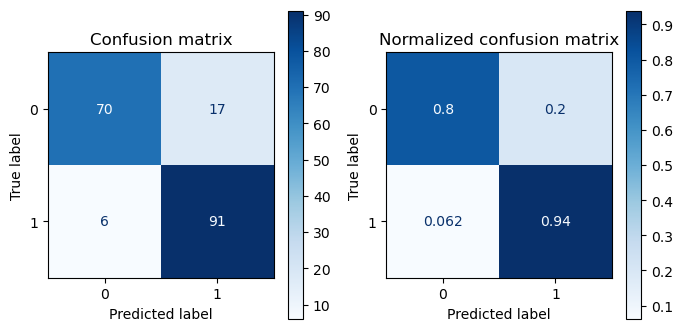

In [96]:
get_evaluation(y_test, rfc_prediction, rfc, X_test)

Ïò§Ï∞® ÌñâÎ†¨
[[73 14]
 [10 87]]
Ï†ïÌôïÎèÑ: 0.8696, Ï†ïÎ∞ÄÎèÑ: 0.8614, Ïû¨ÌòÑÏú®: 0.8969, F1: 0.8788, ROC_AUC: 0.8680
################################################################################


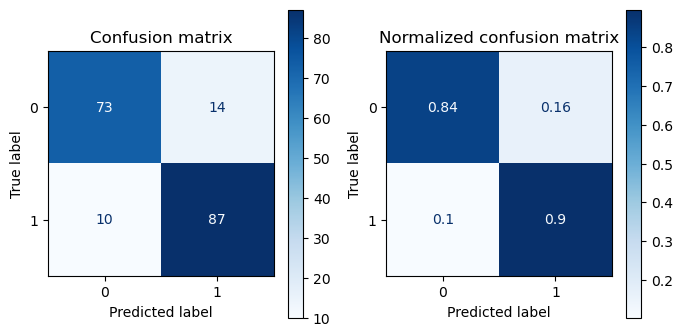

In [97]:
get_evaluation(y_test, ada_prediction, ada, X_test)

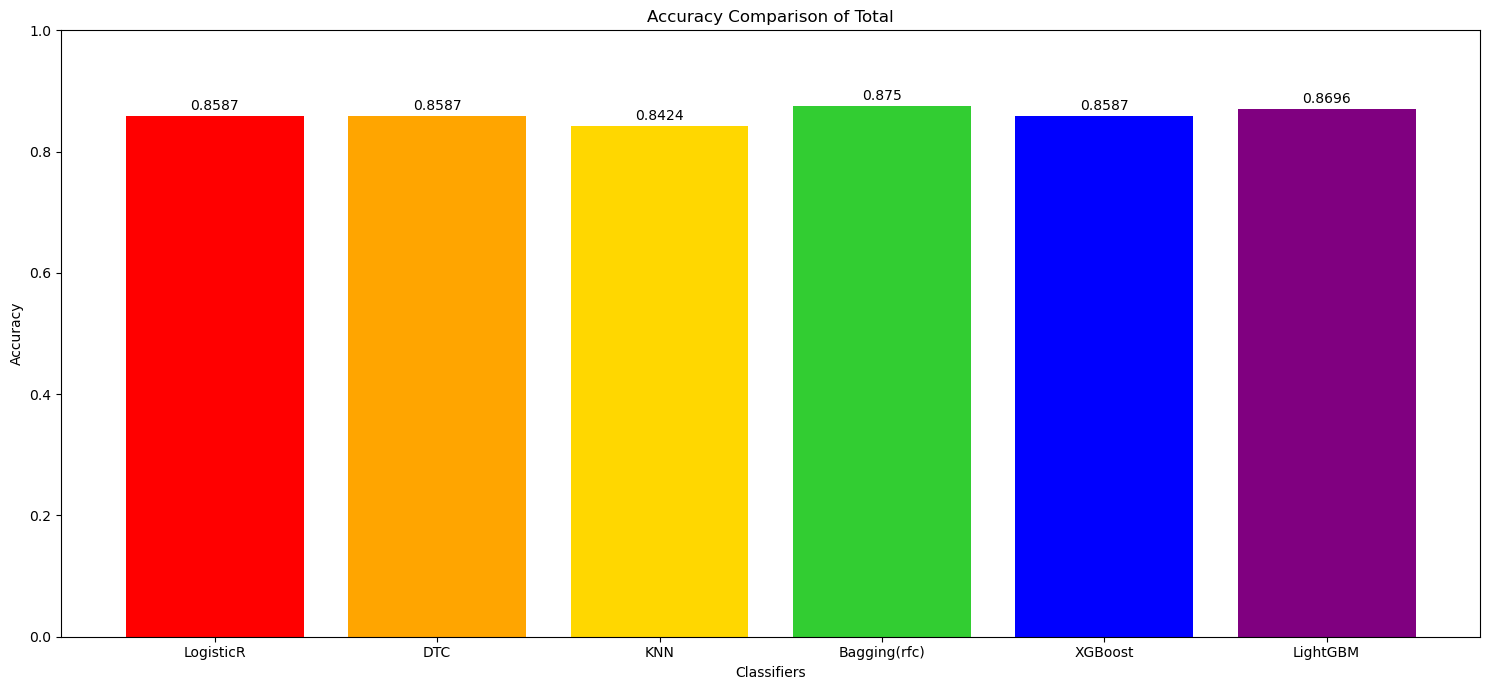

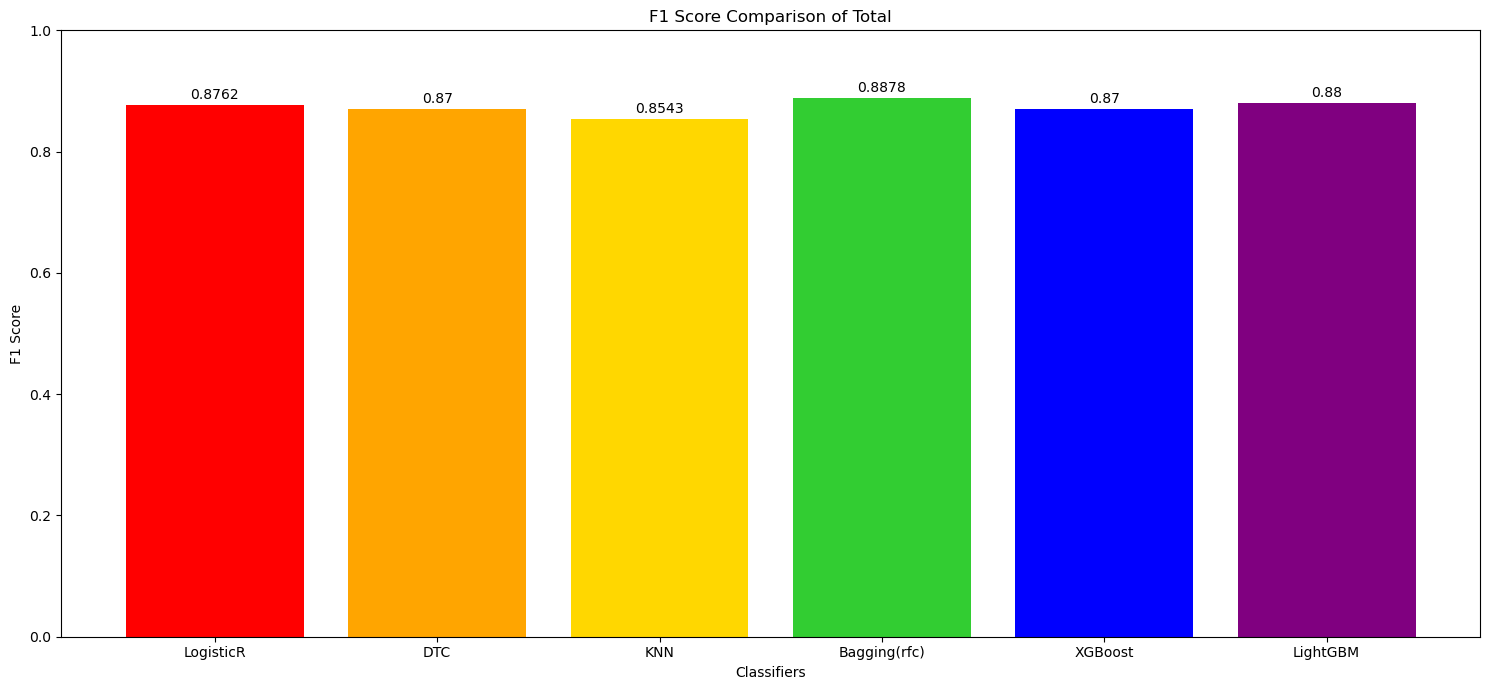

In [101]:
# ÏÑ∏ Î≤àÏß∏ Î∞î Ï∞®Ìä∏
plt.subplots(figsize=(15,7))

colors3 = ['red','orange','gold','limegreen','blue','purple', 'pink']
accuracies3 = [0.8587, dtc_score, knn_score, rfc_score, xgb_score, lg_score]
classifiers3 = ['LogisticR', 'DTC' ,'KNN', 'Bagging(rfc)', 'XGBoost', 'LightGBM']

for i, v in enumerate(accuracies3):
    plt.text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    plt.bar(classifiers3, accuracies3, color=colors3)
    plt.xlabel('Classifiers')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Comparison of Total')
    plt.ylim(0, 1)  # yÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï
plt.tight_layout()
plt.show()
# ÏÑ∏ Î≤àÏß∏ Î∞î Ï∞®Ìä∏
plt.subplots(figsize=(15,7))

colors3 = ['red','orange','gold','limegreen','blue','purple', 'pink']
accuracies3 = [0.8762, dtc_f1, knn_f1, rfc_f1, xgb_f1, lg_f1]
classifiers3 = ['LogisticR', 'DTC' ,'KNN', 'Bagging(rfc)', 'XGBoost', 'LightGBM']

for i, v in enumerate(accuracies3):
    plt.text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    plt.bar(classifiers3, accuracies3, color=colors3)
    plt.xlabel('Classifiers')
    plt.ylabel('F1 Score')
    plt.title('F1 Score Comparison of Total')
    plt.ylim(0, 1)  # yÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï
plt.tight_layout()
plt.show()

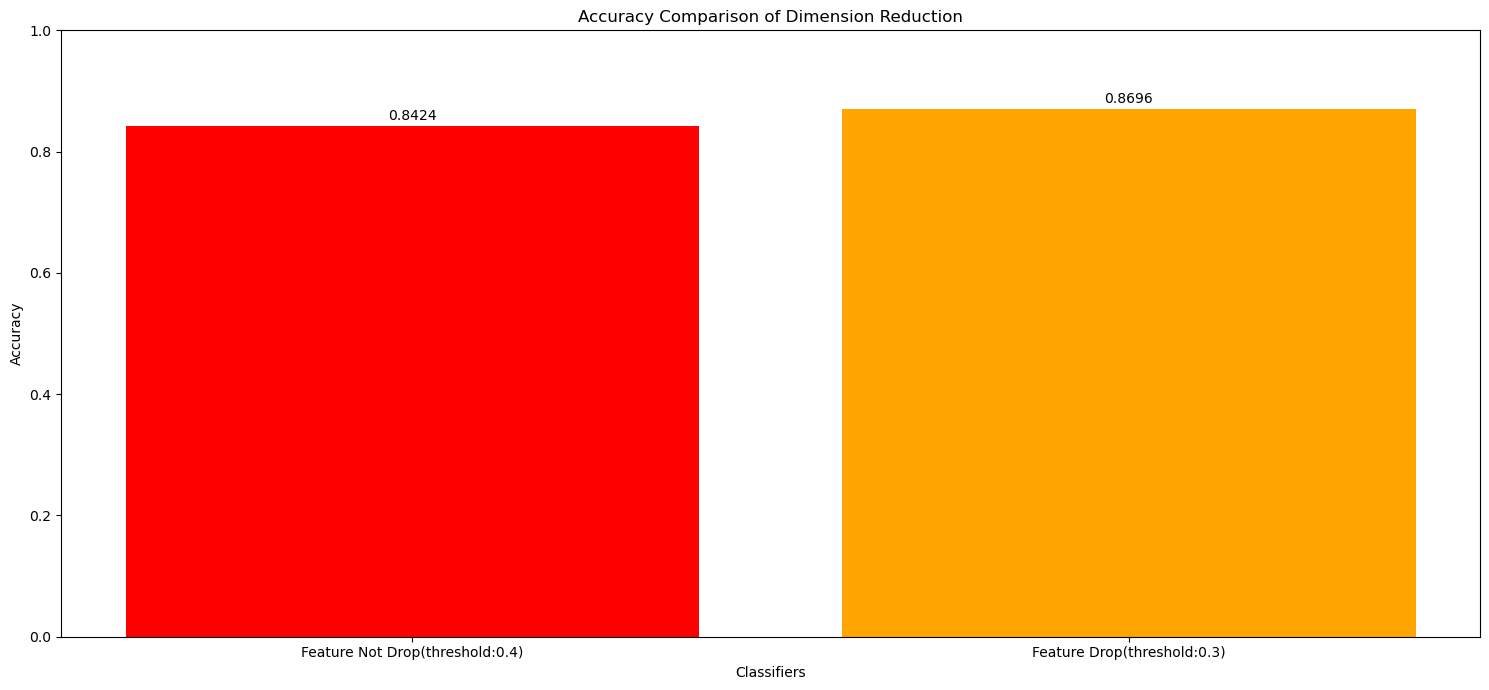

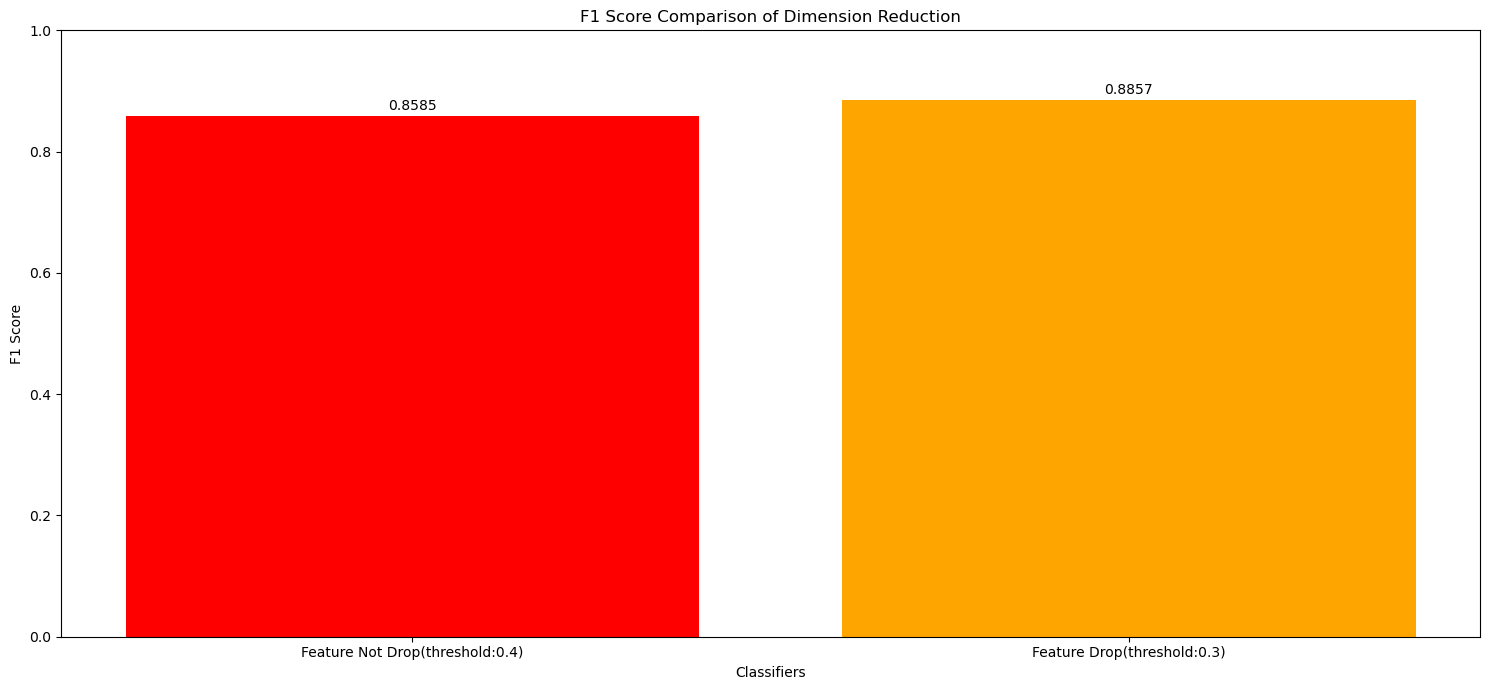

In [38]:
# ÏÑ∏ Î≤àÏß∏ Î∞î Ï∞®Ìä∏
plt.subplots(figsize=(15,7))

colors3 = ['red','orange','gold','limegreen','blue','purple', 'pink']
accuracies3 = [0.8424, 0.8696]
classifiers3 = ['Feature Not Drop(threshold:0.4)', 'Feature Drop(threshold:0.3)']

for i, v in enumerate(accuracies3):
    plt.text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    plt.bar(classifiers3, accuracies3, color=colors3)
    plt.xlabel('Classifiers')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Comparison of Dimension Reduction')
    plt.ylim(0, 1)  # yÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï
plt.tight_layout()
plt.show()
# ÏÑ∏ Î≤àÏß∏ Î∞î Ï∞®Ìä∏
plt.subplots(figsize=(15,7))

colors3 = ['red','orange','gold','limegreen','blue','purple', 'pink']
accuracies3 = [0.8585, 0.8857]
classifiers3 = ['Feature Not Drop(threshold:0.4)', 'Feature Drop(threshold:0.3)']

for i, v in enumerate(accuracies3):
    plt.text(i, v + 0.01, str(round(v, 4)), color='black', ha='center')
    plt.bar(classifiers3, accuracies3, color=colors3)
    plt.xlabel('Classifiers')
    plt.ylabel('F1 Score')
    plt.title('F1 Score Comparison of Dimension Reduction')
    plt.ylim(0, 1)  # yÏ∂ï Î≤îÏúÑ ÏÑ§Ï†ï
plt.tight_layout()
plt.show()